# Ford GoBike Visualization Project
#### **by** Manar Abdullah Al Rawahi
#### For the **Udacity Visualization Project** Conducted on **2024**

## Table of Contents 
1. Introduction
2. Part I - Import Libraries/Data
3. Part II - Data Evaluation/Cleansing
4. Part III - Preliminary Wrangling
5. Part IV - Univariate Exploration
6. Part V - Bivariate Exploration
7. Part VI - Multivariate Exploration
8. Part VII - Conclusion and Summary


## Introduction
> The Ford GoBike sharing-program was launched by Ford in partnership and alliance with the company 'Motivate'; The following sharing-program was launched in June, 2017 in the city of San Francisco. Initially, the program was only launched in Bay Area, San Francisco but was able to expand its operations to further locations in which include but is not limited to San Jose and the East Bay where it reported to include 7,000 bikes and 546 stations. The program was able to expand to various areas due its focus on urban environments; In order to expand its user base, the program focused on ensuring the bikes provided were durable, comfortable, and optimized for various road conditions including hilly areas. Consequently, users are now able to download either the FordPass application or the Ford GoBike application and rent bikes with both the options of two-way trips (renting a bike in a certain location, traveling to the desired location, and returning the bike in the location it was rented) or a one-way trip enabling users to rent bikes and drop them off at the desired location of arrival; This enables Ford to provide users with accessible, sustainable, and affordable mobility options in which overall alligns with Ford's mission and vision.

## Part I - Import Libraries/Data

> This section includes importing relevant libraries into the model while loading the dataset accoridngly. 

**Importing Libraries**

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb
import datetime as dt #added for the timestamp and to calculate the age of users
from geopy.distance import geodesic #added to measure geodesic distance

%matplotlib inline

**Loading Data**

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)
#First 5 Rows of the Data Loaded

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> The first 5 rows of the data was loading using df.head in order to identify the data elements. From the first five rows loaded, it is apparent that the dataset consists of records related to bike-sharing where trip durations are included, the start time of renting the bike is shown in time, the end time of renting the bike is shown in time, along with the latitude and longitutde of starting station and ending station. The data does not only include details related to the duration, location, and identification of the bike id, but also includes demographic details of the renters where it highlights their year of birth, gender, and user type. Although the demographic data is available, from the first 5 rows, it is noted that there are blanks in some of the cells in which can be amended in the data cleansing section of the project.

## Part II - Data Evaluation/Cleansing

> The following section is focused on evaluating the data in different aspects and conducting necassory data cleansing based on the findings from the evaluations. The cleansed data will be utilized in the next sections.

**Data Description**

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> From a quick review of the dataset, it seems like the minimum duration captured in seconds is **61.000** while the maximum duration in seconds is **85444.00**. On average, users are utilizing the bikes for **726.00** seconds. 

**Identify Columns with Blank Cells**

In [5]:
#quick check to identify the number of blank rows in the dataset in total
b_row_count = df.shape[0]
print(f'Number of Blank Rows {b_row_count}')

#calculation to calculate the percentage of blank cells in the data set
b_percentage = (df.isnull().mean() * 100)

#highlight the columns with blanks where the percentage needs to exceed 0.00%
b_columns = b_percentage[b_percentage > 0]
print(f'\nThe columns that have blank values are as follows with their respective blank percentage:\n\n{b_columns}')

Number of Blank Rows 183412

The columns that have blank values are as follows with their respective blank percentage:

start_station_id      0.107408
start_station_name    0.107408
end_station_id        0.107408
end_station_name      0.107408
member_birth_year     4.506248
member_gender         4.506248
dtype: float64


> After identifying the blank columns, it seems that the demographics related columns such as **member_birth_year** and **member_gender** have the highest percentage of blank cells. The lowest percentage of blank cells are in the columns related to the location of the journey in terms of where the journey has started, where it ended, and unique identifiying information to both the components.

> Regardless, all of the rows consisting of blank values will be dropped.

**Delete Blank Rows**

In [6]:
df.replace(['', ' '], np.nan, inplace=True) #ensuring that there is no space in cells causing it not to be identified as true blanks
df.dropna(how='any', inplace=True)
b_row_count = df.isna().sum().sum() #to count the blanks
print(f'The number of blank rows in the df is {b_row_count}') #to verify that all the blank rows have been dropped

The number of blank rows in the df is 0


> All the of blank rows have been dropped and a confirmation print has been created to ensure that there are no longer blank rows.

**Count Number of Columns**

In [7]:
print(len(df.columns)) #just to identify the number of columns

16


**Identify Distinct Elements**

In [8]:
df.nunique() #check for entire dataframe

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

> **start_station_id** has 329 distinct values in which links with the **start_station_name**; This creates the assumption that each start_station_name will have a unique identifier associated to it. This can also be the case with the end_station_id and end_station_name as there are 329 distinct values in the end_station_id in which is the same as the end_station_name.

> In addition, the distinct elements identify that there are only two types of users, 3 gender options, and two options for the bike_share_for_all_trip

> The distinct elements can be considered to be categories and can be investigated further to identify what are the possible values under each of the columns

**Identify Data Types**

In [9]:
#df.info()
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

> It was inititally assumed that member_gender and bike_share_for_all_trip are categories as they did no consist with more than 3 unique values; This assumption was correct due to the output of the data types where member_gender and bike_share_for_all_trip are objects

> In addition the start_station_name and end_station_name are objects in which indicate that they are the name of the stations that users are utilizing to rent and return their bikes. 

> start_time and end_time are marked as object where it is stored as a object where it may be treated as a string of text; therefore it will be converted to date in order to split the date to 'day', 'month' and 'year' for further information.



**Convert Data Types**

In [10]:
start_time = df['start_time'] = pd.to_datetime(df['start_time'])
end_time = df['end_time'] = pd.to_datetime(df['end_time'])
check1 = df['start_time'][0] #confirms that start_time is now formated as a timestamp with the date
check2 = df['end_time'][0] #confirms that end_time is now formatted as a timestamp with the date
print(f'The time stamp for the start time is {check1} and the timestamp for the end time is {check2}')

The time stamp for the start time is 2019-02-28 17:32:10.145000 and the timestamp for the end time is 2019-03-01 08:01:55.975000


> Converting the string to date in order to be able to extract day, month, and year from the data.

In [11]:
df['bike_id'] =df.bike_id.astype(str)

> This converts the bike_id from int64 to string

**Creating Extra Seg' for the Timestamp**

In [12]:
# Configuring the additional columns for the end part of the timestamp
df['end_hr'] = df['end_time'].dt.hour.astype(str)  #hour ended
df['Day_E'] = df['end_time'].dt.day_name()  #day ended
df['Month_E'] = df['end_time'].dt.month_name()  #month ended
df['Year_E'] = df['end_time'].dt.year  #year ended

# Configuring the additional columns for the start part of the timestamp
df['start_hr'] = df['start_time'].dt.hour.astype(str)  #hour start
df['Day_S'] = df['start_time'].dt.day_name()  #day start
df['Month_S'] = df['start_time'].dt.month_name()  #month start
df['Year_S'] = df['start_time'].dt.year  #year start

df.head(10) #checking from running first 10 values

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,end_hr,Day_E,Month_E,Year_E,start_hr,Day_S,Month_S,Year_S
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,8,Friday,March,2019,17,Thursday,February,2019
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,5,Friday,March,2019,12,Thursday,February,2019
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,4,Friday,March,2019,17,Thursday,February,2019
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,0,Friday,March,2019,23,Thursday,February,2019
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,0,Friday,March,2019,23,Thursday,February,2019
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Female,No,0,Friday,March,2019,23,Thursday,February,2019
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Male,No,0,Friday,March,2019,23,Thursday,February,2019
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Other,No,0,Friday,March,2019,23,Thursday,February,2019
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Male,No,0,Friday,March,2019,23,Thursday,February,2019
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Female,Yes,0,Friday,March,2019,23,Thursday,February,2019


## Part III - Preliminary Wrangling Findings

> This highlights the different findings from Part II - Data Evaluation/Cleansing where it will describe the structure of the data set and further information about it.

In [13]:
df.duration_sec.describe() #just for a quick summary although it is already provided above with a more comprehensive view

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

### What is the structure of your dataset?

> After deleting the blank rows from the dataset, it shows that was a total of **174952.000000** rides recorded in the dataset where it was previously at a total higher than **180000.000000**. From the dataset it highlights that the minimum duration is **61** while the highest duration is **84548**.

> Furthermore, the number of columns that the dataset cotains is **22** and that is after the additional columns added after it being extracted from the timestamp; Examples of the column includes 'Day_S', "Day_E' where S represents start and E represents end.

> From the data types, there are different data types in which includes object, int, float64, and str. 

> The data types assisted in identifying the main areas to focus on during the analysis in which will be discussed in the next questions.

### What is/are the main feature(s) of interest in your dataset?

> The main features I am interested in the dataset will be relevant to the user demographics, behaviors, and ride patterns in which can be identified through utilizing the duration of rides, start times, end times, start locations, end locations, user birth year, user gender, user type, and the user's choice towards bike share participation.

> The duration of rides will assist in the evaluation on how long a user may utilize the bike for while also identifying any anomolies or outliers. For example, what a really long ride can be and what a very short ride can be.

> In addition, the starting and ending locations can assist in identifying the most popular stations users want to start with, the most popular stations want to end the trip with and the least popular stations. Furthermore, the following locations can be utilized in corrolation with the start and end times to analyze when are the starting and ending stations most popular in terms of month and year.

> Furthermore, the start and end times can assist in evaluating the week trends, usage peak times, and can be linked to differnet data elements in order to drive further insights such as the locations. For example, maybe some stations might be popular during work days and times where employees are attempting to to ride to their office, or some stations may be popular during certain seasons or holidays.

> Also, the user demographic informaation are considered to be an area of interest as it can be provide certain insights onn the user base in terms of age ranges, genders, and whether the user is a subscriber or customer. Furthermore, we can look at the user's behaviour in terms of whether the user is participating in the bike-sharing programs; This can be a direct link to the frequency a rider may utilize the program vs a user who is not partcipitating - These are additional theories that can be explored in the next sections.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The elements found in the dataset in which will support in the user behavior and bike ride patterns investigation are duration_sec, start_time, end_time, start_station_id, end_station_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitutde, user_type, member_birth_year, and member_gender.

> For the durection_second element, we can evaluate each bike trip's duration in terms of the mean, variability, and outliers. 

> For the start/end_time we can utilize the extracted time stamps to identify the most frequent time the program is utilized, identify the usage peak hours, identify the peak days of the week that the programs are being utilized, and possible seasonal trends as per the months. Extracting the following information and placing them in additional columns highlighting start day, end day, start hour, and end hour (like the Day_S, Month_S, Year_S, etc.) will further assist in understanding patterns over time.

> For the start/end_station_id, and start/end_station_latitude, we can utilize it to evaluate geographical analysis in which also can be ahcieved through using elements such as the start/end_station_name.

> For user_type, we can utilize it as a category where we can investigate the hypothesis that subscribers will have a higher usage of the application in comparsion to the customers in which may utilize the application in lower frequency. In order to test the hypothesis, we can analyse the station usage patterns and trip durations. 

> For the member_birth_year and the member_gender we can utilize it as demographic data in order to identify common ages of riders, trip durations among different age groups, the usage patterns per gender, and different patterns relevant to gender.

> For the bike_share_for_all_trip, this can assist in identifying the frequency users participate in the bike-sharing program in which can be linked to the duration of the trip and the freuqnecy as well.

## Part IV - Univariate Exploration

> In this section, I investigate various distributions of individual variables where there are ***13*** visuals available in the Univariate Exploration in which explores individual variables such as gender, duration, age, etc. In the initial data wrangling findings, I was interested in seeing the number of rides per month in order to identify whether certain seasons or festivities can influence the number of rides per month. However, the month start and month end only highlight rides in February and March; Therefore, that visual was initially created and later deleted.


**Standard-Scaled Plot**

In [14]:
#The bin size is required to be determined for the duration_sec column
duration_data = df['duration_sec']

#Using iqr to compute data spread
q25, q75 = np.percentile(duration_data, [25, 75])
iqr = q75 - q25 #25th and 75th percentile of the data
bin_size = 2 * iqr * len(duration_data) ** (-1 / 3)
print(f"The bin size that will be utilized in plotting a standard scale plot is {bin_size}")


The bin size that will be utilized in plotting a standard scale plot is 16.663885588771564


> Before starting with the standard-scaled plot, we first need to determine the most appropriate bin size. 

> In order to determine the bin's appropriate size, I am using Freedman-Diaconis Rule in order identify the width of bins used in the histogram.

> Using the iqr = q75 - q25 will allow me to identify the range within which the middle 50% of the data lies

> The bin size will be 17 after rounding up 16.663 to 17.

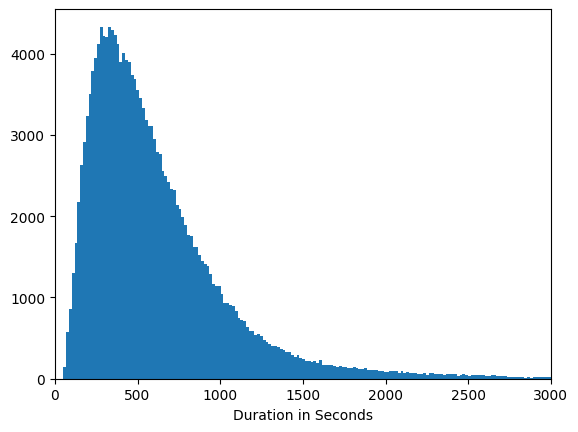

In [15]:
binsize = 17
bins = np.arange(0, df['duration_sec'].max() + binsize, binsize)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel('Duration in Seconds')
plt.xlim([0, 3000])
plt.show()

> The standard scaled plot indicates that the distribution is right skewed. 

> The right-skewed distribution indicates that the majority of the rides are occuring with lower durations in which is evident from the plot having a higher concentration in lower durations.

> Furthermore, the long tail extending to the right indicates that lower number of rides take place at higher durations.

**Log Scale Plot**

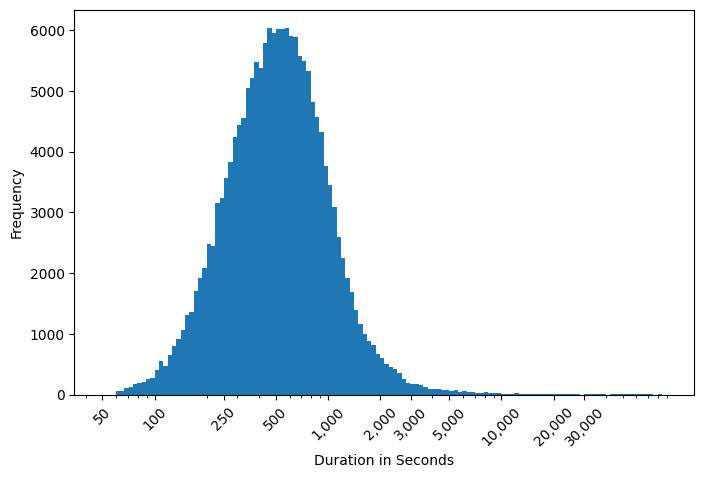

In [16]:
# there's a long tail in the distribution, so let's put it on a log scale instead

bin_size = 0.025
bins = 10 ** np.arange(1.7, np.log10(df['duration_sec'].max()) + bin_size, bin_size)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xscale('log')
t_values = [50, 100, 250, 500, 1000, 2000, 3000, 5000, 10000, 20000, 30000]
plt.xticks(t_values, [f'{int(value):,}' for value in t_values], rotation=45, fontsize=10) #added rotation for the labels that was not initially there as values were overlapping
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency');

> The tick values have been created in a non-standard or non-uniform method where it can be seen to start at 50 as the lowest value and up to the 30,000 as the highest value. The tick values selected supported in identifying where data is dense and where data is sparse.

> In addition, as the data is concentrated between 50 to a 1,000, smaller tick values intervals has been set in comparsion to tick value intervals between 1,000 to 30,000 where the data is evidently more sparse allowing higher intervals between values.

> From the graph, it is apparent that the disribution has a peak in which is between 200 seconds and 1000 seconds.

> The peak in the graph illustrates that rides have shorter durations where lower number of rides will have a longer duration.

**Creating Further Variables for Univarate Exploration**

Categorizing Day and Time Data

In [17]:
#converting columns to categories through defining a function
def convert_to_ordered_categorical(df, ordinal_var_dict):
    for var in ordinal_var_dict:
        if var in df.columns:
            ordered_var = pd.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
            df[var] = df[var].astype(ordered_var)
        else:
            print(f"Warning: The Column '{var}' is not found in DataFrame. Please revise the name and re-run the code to ensure no variable is skipped.") #Just to confirm that its being run and no columns are being skipped
    return df

#mapping the categories for days and hours of the day
ordinal_var_dict = {
    'Day_S': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Day_E': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Month_S': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Month_E': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'start_hr': [str(i) for i in range(24)],
    'end_hr': [str(i) for i in range(24)]
}

df = convert_to_ordered_categorical(df, ordinal_var_dict)

> The code above defines the day's order in which initiates by Monday and ends on Sunday; This allows to convert the data into ordered categorical data in which will support in further univarate exploration.

> Furthermore, the code also looks at the hours of the day where it generates the numbers from 0 to 23 to represent the hours of the day and then accordingly transform into string to ensure cateogrization. 

> Through this, the data now has a natural order where the days initiate from Monday and end on Sunday while the hours of the day initiate with 0 and end with 23. This will ensure that the data is now sorted and elements such as Tuesday will not come before Monday due to their logical order.

> Similarly to the hours and time of day, this was also conducted for the Months where it was mapped to start from January and end on December.

Distance

In [18]:
df['distance'] = df.apply(lambda row: geodesic((row['start_station_latitude'], row['start_station_longitude']),(row['end_station_latitude'], row['end_station_longitude'])).kilometers, axis=1)
df.head(5) #loading first 5 balues to see how the data is presented with the new distance column

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,end_hr,Day_E,Month_E,Year_E,start_hr,Day_S,Month_S,Year_S,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,8,Friday,March,2019,17,Thursday,February,2019,0.543983
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,5,Friday,March,2019,12,Thursday,February,2019,2.705390
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,4,Friday,March,2019,17,Thursday,February,2019,0.260896
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,0,Friday,March,2019,23,Thursday,February,2019,2.412017
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,0,Friday,March,2019,23,Thursday,February,2019,3.328256


> As the goedesic function allows for a real-time geogrphical distance computation utilizing both the starting/end station's latitude and longtitude, it was possible to create a new variable in which represents the distance of each ride; The distance is represented in km.

> Through the newly created variable, I will be able to create an analysis in which assess the typical distances covered by users in which may identify usage patterns and user prefernces. 

> Furthermore, utilizing this, a histogram can be created in which highlight the distributors of rides based on distance in which will identify the proportion of rides in which are short commutes and rides in which are longer commutes.

> In addition, a further analysis will conducted to identify the common distances between stations, this can be used to identify the locations in which are the best to allocate resources (for example, more bikes at frequently traveled distances).

Adding Minutes

In [19]:
df['start_min'] = df['start_time'].dt.minute.astype(str)
df['end_min'] = df['end_time'].dt.minute.astype(str)
df.head(1) #to check

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,Day_E,Month_E,Year_E,start_hr,Day_S,Month_S,Year_S,distance,start_min,end_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Friday,March,2019,17,Thursday,February,2019,0.543983,32,1


> Hour was added in the preliminary wrangling sections, however, after further analysis, it was evident that minutes is an important variable to be added, espeically to compare to commute length.

**Typical Commute Length and Duration**

In [20]:
#The bin size is required to be determined for the distance column
distance_data = df['distance']

#Using iqr to compute data spread
q25, q75 = np.percentile(distance_data, [25, 75])
iqr = q75 - q25 #25th and 75th percentile of the data
bin_size = 2 * iqr * len(distance_data) ** (-1 / 3)
print(f"The bin size that will be utilized in plotting a standard scale plot is {bin_size}")

The bin size that will be utilized in plotting a standard scale plot is 0.047022393916892564


> Similar to when calculating the bin size for the duration column, this was repeated for the distance column in order to determine the binsize for the below visual.

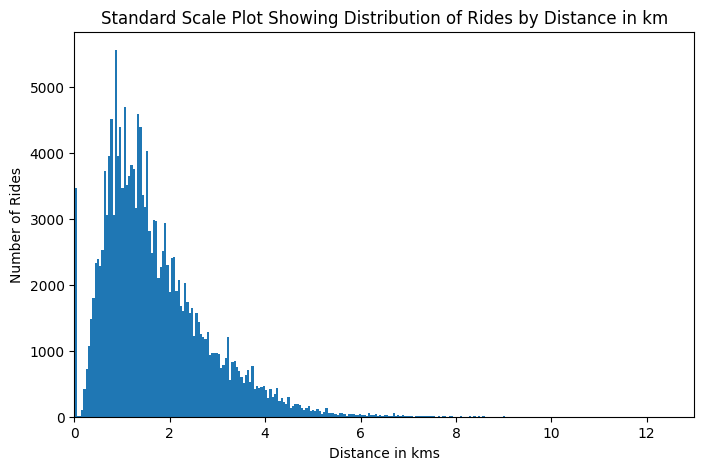

In [21]:
# plotting distance on a standard scale

bin_size = 0.0470  # Based on the results using IQR
bins = np.arange(0, df['distance'].max() + bin_size, bin_size)  
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'distance', bins = bins, color = 'tab:blue')
plt.xlim([0, 13]) #I initially set this df['distance'].max() and changed it in order to show a clearer plot
plt.xlabel('Distance in kms')
plt.ylabel('Number of Rides')
plt.title('Standard Scale Plot Showing Distribution of Rides by Distance in km')
plt.show()

> From the results, it appears that majority of the rides are short commutes in which explains the high density between a bit above 0 and 2 where a gradual descrease of number of rides is noted after 2km highlighting that lower numbers of rides take place for higher distances. 

> While the majority of number of rides are short distance, this could indicate that the bikes are utilized to travel for short distances, this can be further compared to the number of rides and distance that occurs in different months of the year with the hypothesis that the number of rides may increase during months with fesitivities, holidays, or celebration. If that is the case, then promotional offers can be released during these seasons to attract more users to utilize the bikes.

> It would also be interesting to compare the distance results to the total time a bike is rented in the bivariate section.

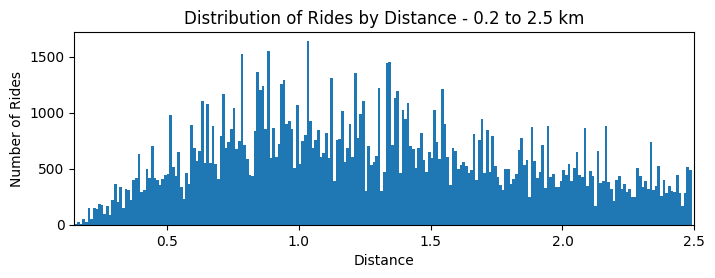

In [22]:
# investigating further on an even smaller bin size

binsize = 0.01  # Smaller bin size than the suggest iqr bin size
bins = np.arange(0.15, 2.5, binsize)
plt.figure(figsize=[8, 2.5])
plt.hist(data = df, x = 'distance', bins = bins, color='tab:blue')
plt.xlim([0.15, 2.5])
plt.xlabel('Distance')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Distance - 0.2 to 2.5 km')
plt.show()

> The results of the histogram indicate that the majority of the rides are taken for approximate distances between 0.5 km to 1.5 km which could be why the peak in the previous histogram showed the peak at 1 km.

> Furthermore, the peak at approximately 1km indicates that 1km could be the distance that satisfy the majority of the users needs; This could be to travel between different popular commercial spots, travel between residential area, or utilize as an alternative to cars to get by locations with traffic easier.

> After 1.5 km, a decreasing trend is noted in which suggests that fewer users are interested in taken longer distance rides; It would be interesting to see the transportation options available in the cities with the bikes to see if there are more favorable transportation options that serve users to get to further places.

start_hr     int64
start_min    int64
end_min      int64
dtype: object


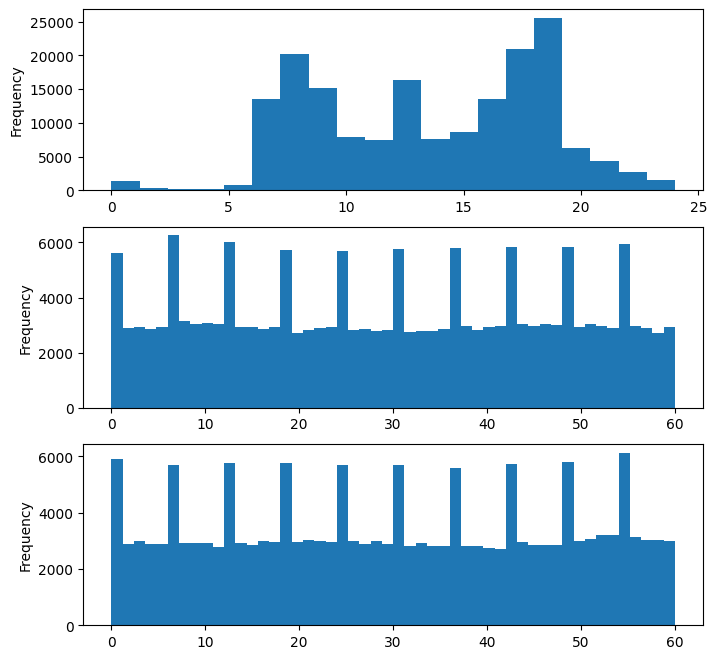

In [23]:
# let's start with the major dimensions of the distance, with start_hr ,start_min , and end_min.

df['start_hr'] = pd.to_numeric(df['start_hr'], errors='coerce')
df['start_min'] = pd.to_numeric(df['start_min'], errors='coerce')
df['end_min'] = pd.to_numeric(df['end_min'], errors='coerce')
print(df[['start_hr', 'start_min', 'end_min']].dtypes) #code wasnt running earlier because it was string
fig, ax = plt.subplots(nrows=3, figsize=[8, 8])
variables = ['start_hr', 'start_min', 'end_min']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(df[var].min(), df[var].max() + 1.2, 1.2)
    ax[i].hist(df[var], bins = bins, color='tab:blue')
    ax[i].set_ylabel('Frequency')

plt.show()

> The output illustrates that majority of the rides take place during working hours or during the day (Between 8 AM and 6 PM). During this period, it is infered that majoirty of the rides can be short trips in which can be utilized for commutes and errands, rather than extended hourneys. 

> Furthermore, it is noted that there is an even distribution in start minute and end minute where they are unformly distributed suggesting that rides can take place accross the hour.

> From examining both the start minute and end minute, it can be assumed that majortiy of the rides range between the duration of 10 minutes to 30 minutes as if the rides had a higher duration, such as an hour, there would be clear peacks in the end_min graph (last graph). The following hypotheses can be confirmed in the next graph  through calculating the duration in minutes. It was noted that this has already been examined in seconds, however, it will be examined further in minutes.

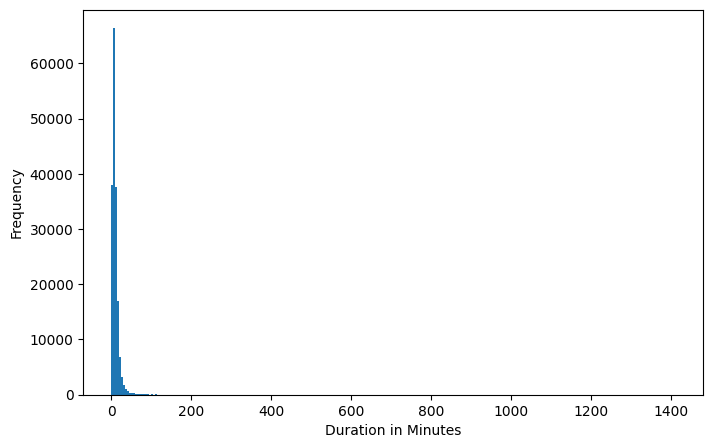

In [24]:
df['duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60
plt.figure(figsize=(8, 5))
bins = range(0, int(df['duration_min'].max()) + 5, 5)
plt.hist(df['duration_min'], bins=bins, color='tab:blue')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.show()

> The output is shown where a bin was created for every 5 minutes

> The next graph will filter the rides duration where it will only be showen from 0 to 60 minutes as from the above graph it suggests that all of the rides' duration is less than 200 minutes and the peak appears to be in rides in less than 60 minutes.

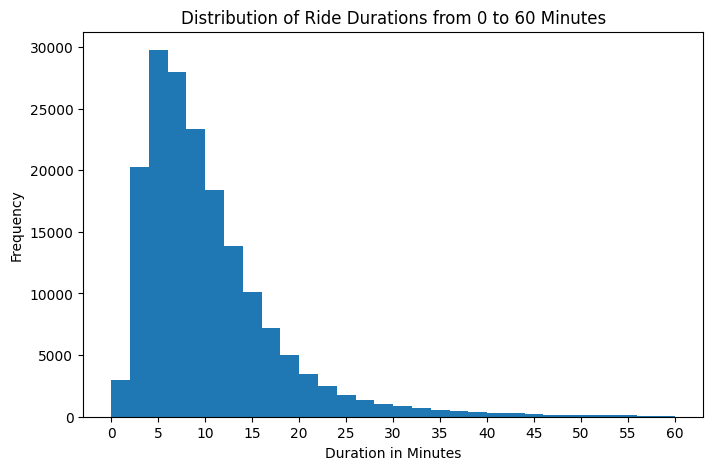

In [25]:
df['duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60
filtered_df = df[df['duration_min'].between(0, 60)]
plt.figure(figsize=(8, 5))
bins = range(0, 61, 2)
plt.hist(filtered_df['duration_min'], bins=bins, color='tab:blue')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Durations from 0 to 60 Minutes')
plt.xticks(range(0, 61, 5))
plt.show()

> The bin interval is every 2 minutes to ensure more granualar results with ticks of 5 minutes to ensure that the plot is readable.

> Similar to duration in seconds, the data highlights a right skewed distribution where the majority of the rides last less than 15 minutes in which confirms that shorter rides are more common than to longer rides.

> After 15 minutes, the frequency of the rides drop. Although this chart examines rides only between 0 to 60 minutes, it seems that the number of rides becomes very low after 40 minutes.

> The initial hypothesis was the peak would range from 10 to 30 minutes, however, the actual observation highlights that the peak occurs between 50 to 10 minutes. Furthermore, although the initial hypothesis assumed that the majority of the rides is beteen 10 to 30 minutes, the actual observation highlights that there is steady decline in frequency after 10 minutes where by 20 munutes, there's a sharp decline of frequency. Therefore, the number of rides exceeding 20 minutes is way less than initially hypothesised. 

**Outliers**

In [26]:
# select low outliers and high outliers

low_outliers = df['duration_min'] < 3
high_outliers = df['duration_min'] > 45
print(f"Low Duration Outliers: {low_outliers.sum()}")
print(f"High Duration Outliers: {high_outliers.sum()}")
print(df.loc[low_outliers, :])
print(df.loc[high_outliers, :])

Low Duration Outliers: 11053
High Duration Outliers: 2309
        duration_sec              start_time                end_time  \
30               163 2019-02-28 23:50:45.698 2019-02-28 23:53:29.569   
36               148 2019-02-28 23:47:02.953 2019-02-28 23:49:31.141   
43               116 2019-02-28 23:44:00.988 2019-02-28 23:45:57.482   
46               157 2019-02-28 23:41:35.898 2019-02-28 23:44:12.950   
58               120 2019-02-28 23:34:58.986 2019-02-28 23:36:59.378   
...              ...                     ...                     ...   
183393           155 2019-02-01 00:37:26.368 2019-02-01 00:40:01.576   
183395            95 2019-02-01 00:37:23.115 2019-02-01 00:38:58.346   
183405           111 2019-02-01 00:14:49.874 2019-02-01 00:16:41.301   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   

        start_station_id                   start_station_name  \
30          

> The thresholds was set for both high and low duration outliers based on earlier observations made in the previous plot and their comparsion to the initial hypothesis.

> The low durations rides were set to less than 3 minutes while long duration rides were set to higher than 45 minutes.

> 11,053 rides tooks place for a short duration in which is less than 3 minutes while 2,309 rides took place for a longer duration in which exceeds 45 minutes.

**Ride Frequency per Day**

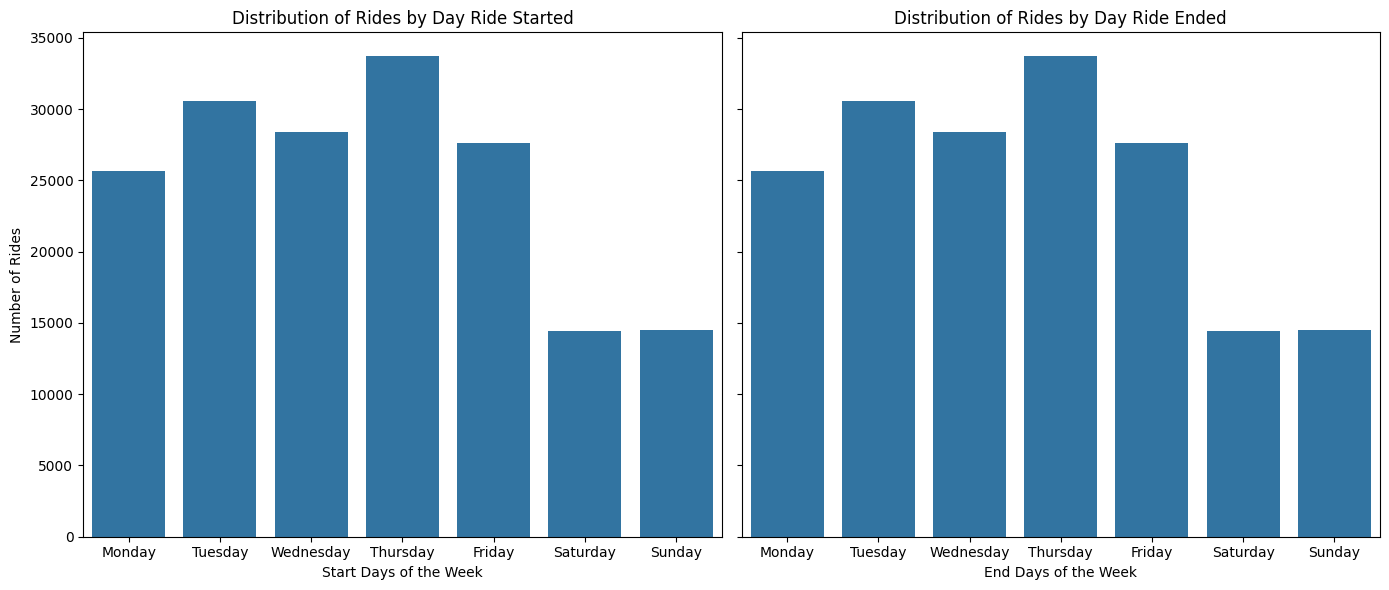

In [27]:
# let's plot all two together to get an idea of each ride distribution per day.

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#start day
sb.countplot(data=df, x='Day_S', ax=axes[0], 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[0].set_title('Distribution of Rides by Day Ride Started')
axes[0].set_xlabel('Start Days of the Week')
axes[0].set_ylabel('Number of Rides')

#end day

sb.countplot(data=df, x='Day_E', ax=axes[1], 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1].set_title('Distribution of Rides by Day Ride Ended')
axes[1].set_xlabel('End Days of the Week')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

> It is noted from the above plot that there are higher activities during the weekdays randing from Monday to Friday and lower activity during the weekends (Saturday and Sunday).

> The higher frequency of rides during weekdays may illustrate that the service might be heavily used for work or school-related travel during the week.

> Out of all of the days of the week, both plots indicate that there is a spike in the middle of the week, especially on Thursday.

**Number of Rides per Hour of the Day**

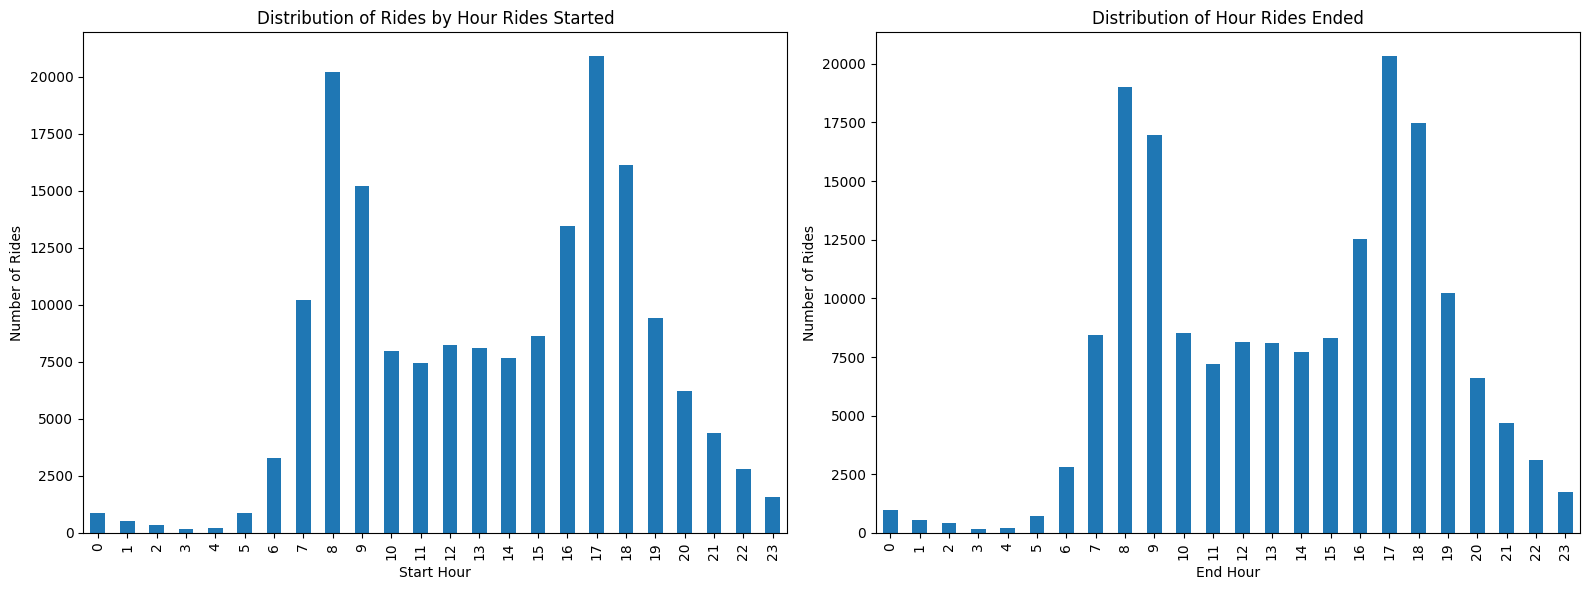

In [28]:
# let's plot all two together to get an idea of each ride distribution per hour.

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#start hour

df['start_hr'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='tab:blue'
)
axes[0].set_title('Distribution of Rides by Hour Rides Started')
axes[0].set_xlabel('Start Hour')
axes[0].set_ylabel('Number of Rides')

#end hour

df['end_hr'].value_counts().sort_index().plot(
    kind='bar', ax=axes[1], color='tab:blue'
)
axes[1].set_title('Distribution of Hour Rides Ended')
axes[1].set_xlabel('End Hour')
axes[1].set_ylabel('Number of Rides')

plt.tight_layout()
plt.show()

> From the above plots, it is evident that there is a peak between the times 7 AM to 9 AM in which indicate that there are significant number of rides taking place during the monring; This is assumed to be done during morning commute to workplaces or classes.

> Furthermore, the above plots indicate that there is a clear peak between the times 4 PM to 6 PM in which illustrates evening commute. Assuming that the hypothesis the morning peaks are utilized for work/school/class commutes, the peaks at 4 PM to 6 PM allign with the hypothesis as it indicates that users may be utilizing bikes during that period to return from their workplaces/schools/universities, etc.

> In addition, the graphs highlighting the usage of bikes during days of the week also alligns with the hypothesis that the bikes are mainly being utilized for school or work related commutes.

> In both the plots, it indicates that there are very few rides starting or ending between 12 AM and 5 AM.

**Number of Rides Taken per Gender**

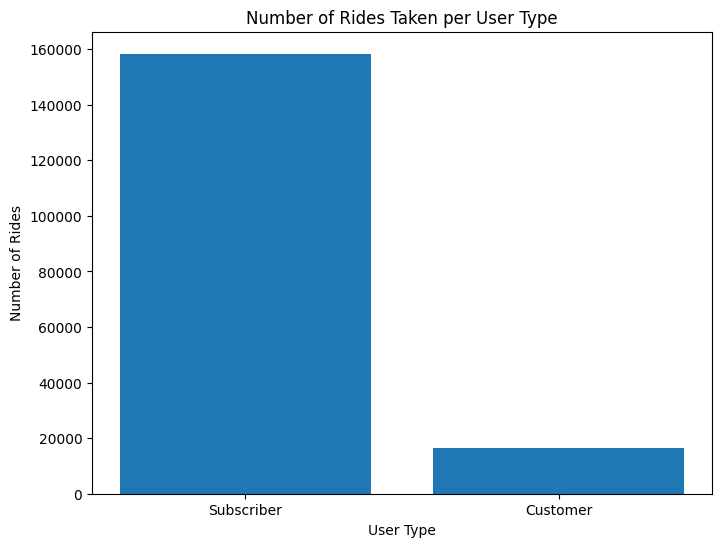

In [29]:
count_per_user_t = df['user_type'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(count_per_user_t.index, count_per_user_t.values, color = 'tab:blue')
plt.title('Number of Rides Taken per User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.show()

> The following plot highlights that there are higher number of rides taken by users who are subscribers than users who are not subscribed.

**Frequency of Bike Share Rides and Non-Bike Share Rides**

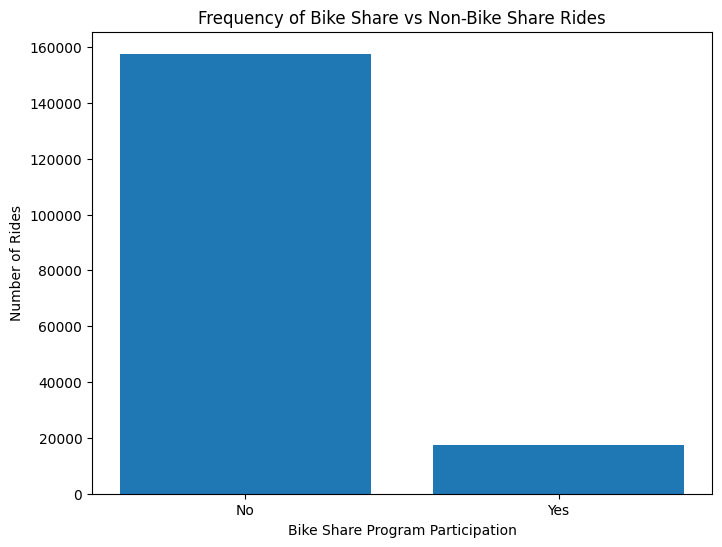

In [30]:
bikeshare_counts = df['bike_share_for_all_trip'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bikeshare_counts.index, bikeshare_counts.values, color=['tab:blue'])
plt.title('Frequency of Bike Share vs Non-Bike Share Rides')
plt.xlabel('Bike Share Program Participation')
plt.ylabel('Number of Rides')
plt.show()

> From the bar chart above, it shows that there are higher frequency of rides taking place without utilizing the bike share program participation. 


**Number of Rides per Age Group**

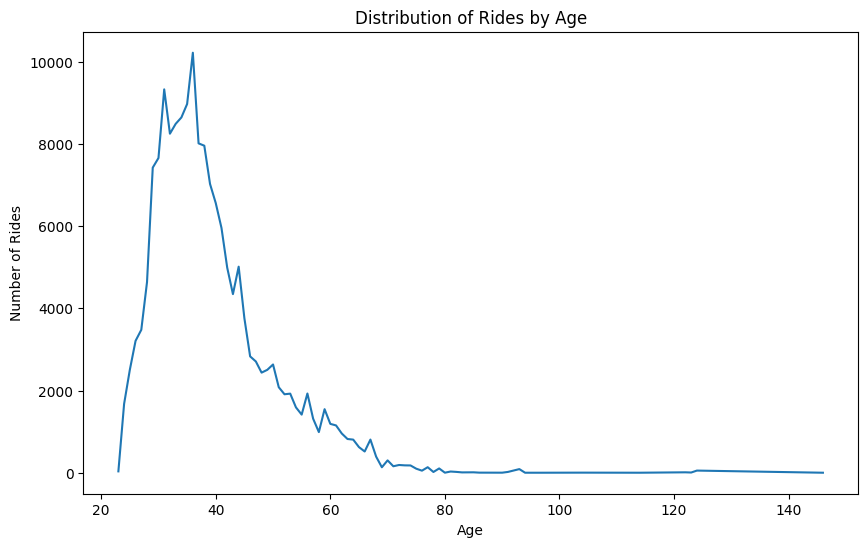

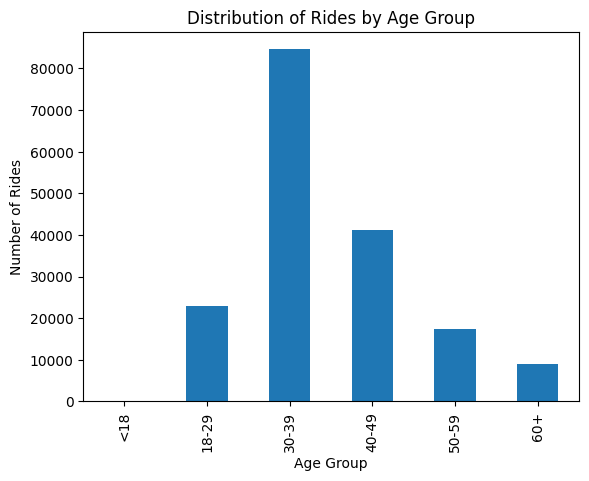

In [31]:
import datetime # I re-imported this here because although its in the beginning, I would run through errors in this visual specifically

#per age
this_year = datetime.datetime.now().year
df['age'] = this_year - pd.to_numeric(df['member_birth_year'])
age_dist = df['age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(age_dist.index, age_dist.values, color='tab:blue')
plt.xlabel('Age')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Age')
plt.show()

#per age group
bins = [0, 18, 30, 40, 50, 60, 100]
xlabels = ['<18', '18-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=xlabels, right=False)
df['age_group'].value_counts().sort_index().plot(kind='bar', color='tab:blue')
plt.xlabel('Age Group')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Age Group')
plt.show()

> In the line graph, it is apparent that there are no users below the age of 18, although after research, the legal age to drive in California starts from 16.

> Instead, the rise of users start from the age of 30 and decline starting from 40; This is more clear when looking at the bar graph with age groups. Therefore, this is an indication that the majorirty of the rides taken are taken by users who are between the ages of 30 and 40.

> The pattern presented in the graph suggests that adults above the age of 40 and adults below the age of 30 are less likely to use bike-sharing services frequently.

> Although it is less likely for adults above the ages of 40 to utilize the service, there are still a minimal number of rides observed among individuals aged 70 and above.


In [32]:
#above 90

outliers_90 = df[df['age'] > 90]
print("Outliers users aged above 90):")
print(outliers_90[['member_birth_year', 'age']])
outlier_count_90 = outliers_90.shape[0]
print(f"Number of users aged above 90: {outlier_count_90}")

#above 100

outliers_100 = df[df['age'] > 100]
print("Outliers users aged above 100):")
print(outliers_100[['member_birth_year', 'age']])
outlier_count_100 = outliers_100.shape[0]
print(f"Number of users aged above 100: {outlier_count_100}")

Outliers users aged above 90):
        member_birth_year    age
1285               1900.0  124.0
5197               1931.0   93.0
5266               1931.0   93.0
5447               1931.0   93.0
10827              1900.0  124.0
...                   ...    ...
177708             1900.0  124.0
177885             1902.0  122.0
177955             1933.0   91.0
182830             1901.0  123.0
183388             1927.0   97.0

[187 rows x 2 columns]
Number of users aged above 90: 187
Outliers users aged above 100):
        member_birth_year    age
1285               1900.0  124.0
10827              1900.0  124.0
16087              1900.0  124.0
17981              1920.0  104.0
18885              1920.0  104.0
...                   ...    ...
171996             1900.0  124.0
173711             1900.0  124.0
177708             1900.0  124.0
177885             1902.0  122.0
182830             1901.0  123.0

[75 rows x 2 columns]
Number of users aged above 100: 75


> No users above a 100, but there are users above 90. These are considered to be error in registeration and are to be removed.

In [33]:
df.loc[df['age'] > 90, 'age'] = np.nan
#reusing below code to just check
outliers_90 = df[df['age'] > 90]
print("Outliers users aged above 90):")
print(outliers_90[['member_birth_year', 'age']])
outlier_count_90 = outliers_90.shape[0]
print(f"Number of users aged above 90: {outlier_count_90}")

Outliers users aged above 90):
Empty DataFrame
Columns: [member_birth_year, age]
Index: []
Number of users aged above 90: 0


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I was mainly interested in exploring the frequency of rides per Month; Therefore, during my Data Evaluation/Data Cleansing, I created an additional column in order to represent both the start month and the end month. However, when visualizing it, it showed that there are only rides taking place in February; This discovery was disappointing as it was going to play a crucial role in the analysis highlighting peaks in seasons. Due to this, the code was dropped entirely. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During the univariate exploration, a few unusual distributions were identified and several data transformations took place.

> Firstly, the age distribution showed a high decline of users past the age of 40 and very minimal usage of users beyond the age of 70. Although this is typical, I still checked for outliers like unusually high ages (For example, people over 90, which could result from incorrect data entries). There were 112 users detected to utilise the application above the age of 90. Instead of dropping these rows, they values were converted to NaN.

> Furthermore, the gender chart highlighted that there is a great gender imbalance where the distribution is heavily skewed with more males users than female users; This could indicate that the service or application is more appealing to men than other genders.

## Part V - Bivariate Exploration

> In this section,  an investigation and evaluation will take place in which will assess the relationships between pairs of variables in the Ford-GoBike data set. Some of the variables in explored in the following section have been introduced in Part I and Part II. Furthermore, some of the variables have been explored in the previous section univariate exploration.

**Weekly Usage Accross Demographics**

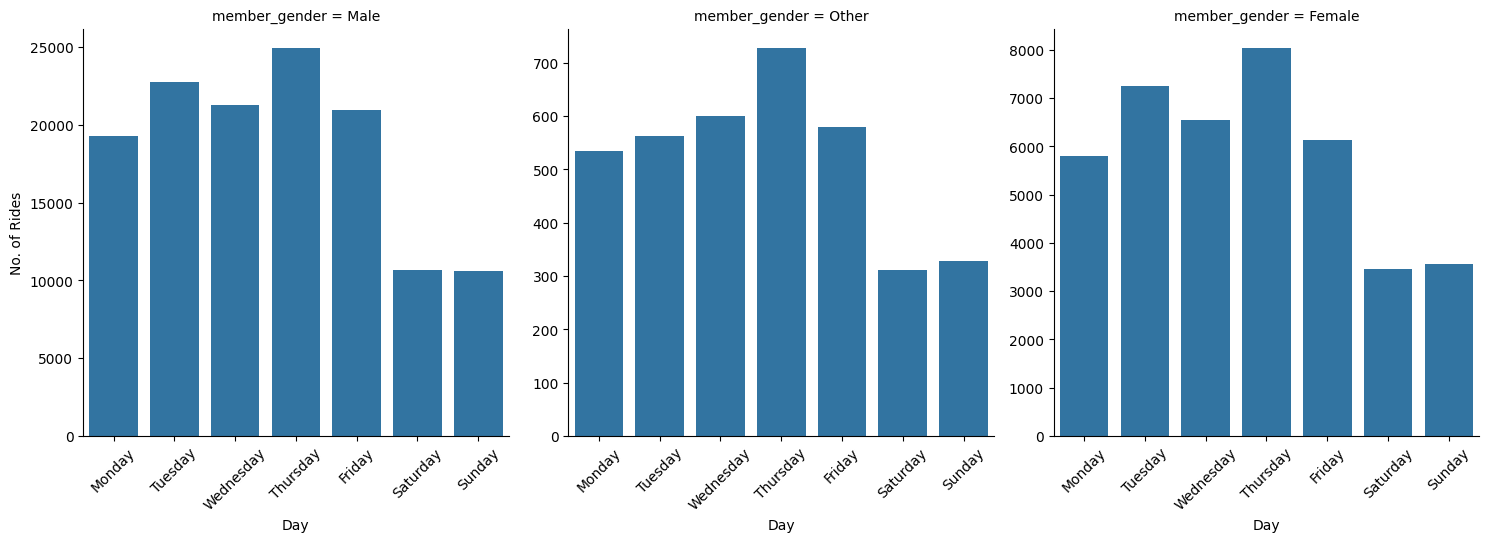

In [34]:
# gender

order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot = sb.catplot(data=df, x='Day_S', col='member_gender', kind='count', order = order_week, color = 'tab:blue', sharey=False)
plot.set_xticklabels(rotation=45)
plot.set_xlabels('Day')
plot.set_ylabels('No. of Rides');

> It is noted that regardless of the gender, Thursday is considered to be the highest day for all rides while both Saturday and Sunday have the lowest number of rides across days of the week.

> When looking at gender distribution, it is illustrated in the plot above that 'Male' highlights the largest number of rides across the other available genders, where 'Thursday' is considered to be the busiest day, followed by Tuesday, then followed by Wednesday.

> When looking at the 'Female' gender distribution, the peak of rides is noted as Thursday, similar to 'Male', but it the number of rides taking place is considered to be much lower than the number of rides taken by 'Male' on 'Thursday'. Regardless, Thursday is considered to be the peak, followed by Tuesday.

> When looking at the 'Other' gender, it shows a similar trend to both 'Male' and 'Female' where 'Thursday' is the peak but the overall number of rides is considered to be signficiantly lower than both the genders 'Male' and 'Female'

> Regardless of the gender, there is a strong contrast between weekday and weekend activities where there is a signficant drop among all genders when it comes up to the weekend (Saturday and Sunday)

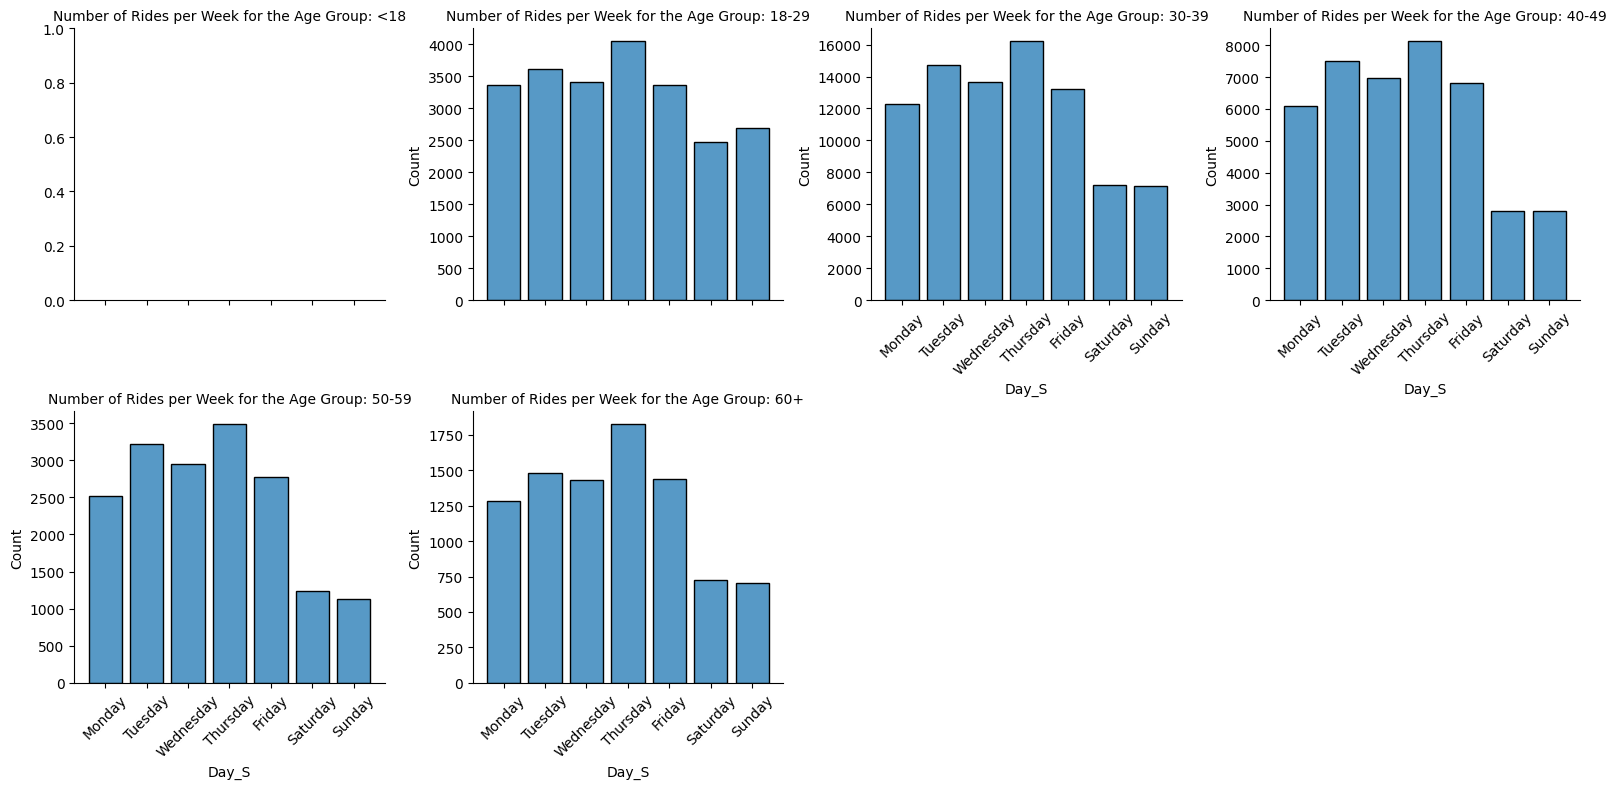

In [35]:
# age groups

below_90 = df[df['age'] <= 90]
g = sb.FacetGrid(below_90, col='age_group', col_wrap=4, height=4, sharey=False)
g.map(sb.histplot, 'Day_S', discrete=True, color='tab:blue', shrink=0.8)
g.set_titles(col_template="Number of Rides per Week for the Age Group: {col_name}")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout();

> It is apparent that there is no data for the age group '<18', although as mentioned in the previous section that the legal age to drive in California is 16 and above.

> For the age groups existing in the dataset, there is a peak noted at mid-week where Thursday is the peak followed by other days of the week (Tuesday and then Wednesday).

> There is a sharp drop in weekends where the number of rides significantly drop on Saturdays and Sundays. 

> From all the age groups available, the age group 30 to 49 is considered ot be the most active age group where they typically are seen tobe more active during business days; This might highlight that this age group utilizes the service frequently to get back and from work.

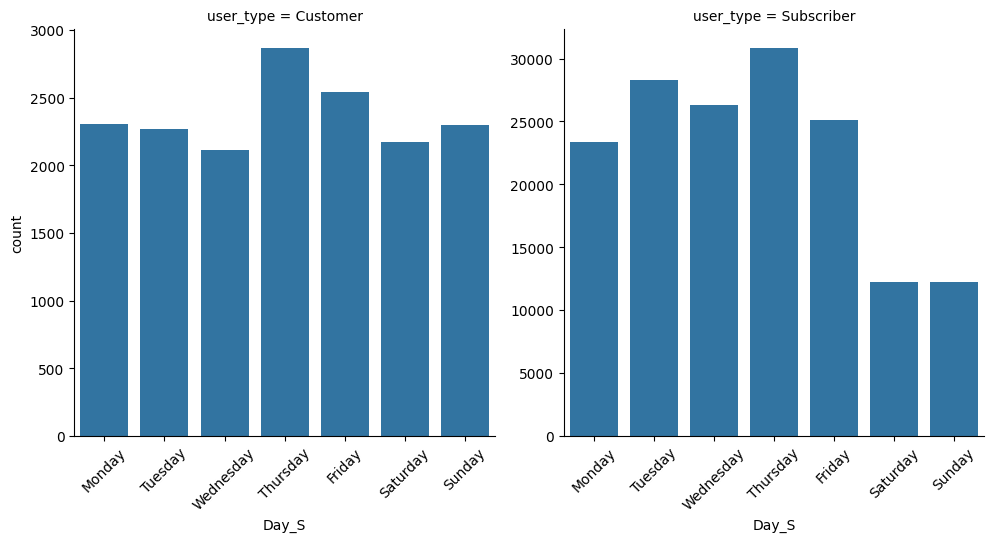

In [36]:
# customer type

order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
s = sb.catplot(data=df, x='Day_S', col='user_type', kind='count', order = order_week, color='tab:blue', sharey=False)
for ax in s.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()


> The usage accross days of the week differ between the subscirber and the customer.

> The subscriber user type heavily utilize the bikesharing service during the middle of the week where their usage sifniciavtly drops during the weekends.

> However, customers utilize the bikesharing service throughout the week, where there is not a drop noted during the weekends.

> The trend comparsion between subscribers and customers could suggest that subscribers are utilizing the service during business days for work-related purporses while customers are utilizing the service throughout the week in which may suggest that they tourists or casual users.

> This insight highlights that subscribers can be offered a promotional offer where there are discounted rides during weekends (due to the drop of usage in the weekend); This could support in increasing the number of subscribers in the database and could incentivse higher usage in the weekends.

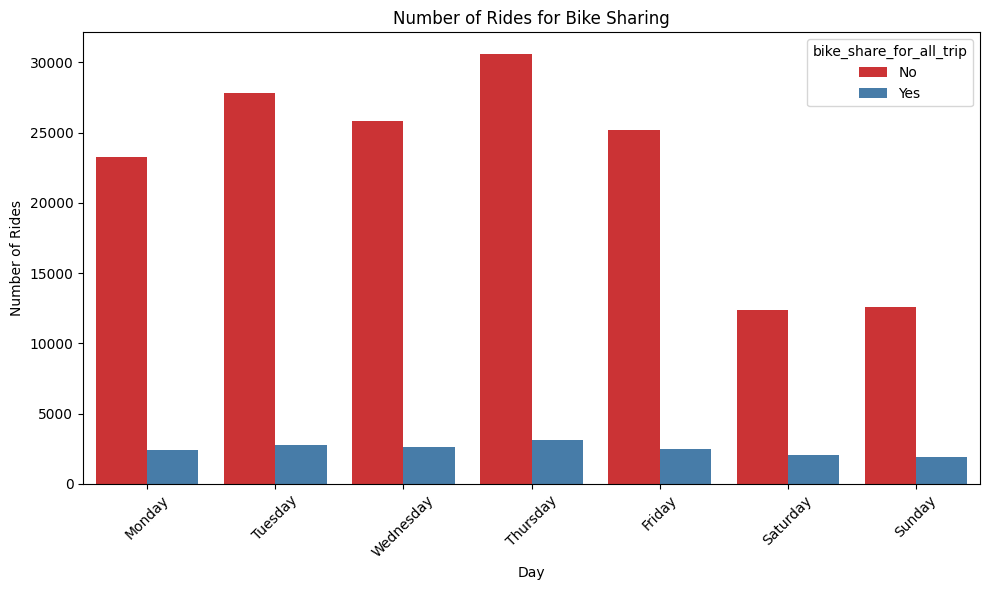

In [37]:
# bike sharing (y/n)

plt.figure(figsize=(10, 6))
sb.countplot(x='Day_S', hue='bike_share_for_all_trip', data=df, palette='Set1')
plt.title('Number of Rides for Bike Sharing')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout();

> The majority of rides do not involve bike sharing where across all the days of the week, the majortiy of the rides are categorized as 'no' for bike sharing in which illustrate that the majortiy of the demographic do not utilize that option.

> Although the number of rides categorized as 'yes' for the bike sharing are low, they are consisntely low accross the week where there is no extreme increase of decrease.

> Regardless, Thursday is considered to be the day with the highest number of total rides accross both 'yes' and 'no' category while there is a weekend decline noted in both categories as well.

**Duration Accross Demographics**

<Figure size 1000x1000 with 0 Axes>

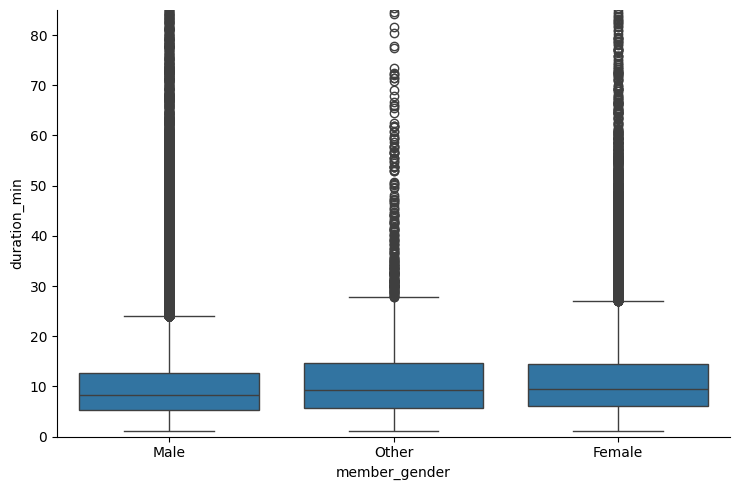

In [38]:
# gender

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color= 'tab:blue')
plt.figure(figsize=(10, 10))
s = sb.PairGrid(data=df, y_vars='duration_min', x_vars=['member_gender'], height=5, aspect=1.5)
s.map(boxgrid)
plt.ylim([0, 85])
plt.tight_layout();

> Data is limited to 85 minutes in the above box plot. 

> It is noted there is a wide range of outliers for both 'Male' and 'Female' extendind beyond 80 minutes while for 'Other' extending beyond 60 minutes.

> Accross the three genders, the median ride duration is approximately between 10 to 12 minutes. Similarly, the spread is a bit similar accross the genders where 50% of the rides are around 5 to 15 minutes.

> The next graph narrows the duration where it will be zoomed to 35 minutes.

<Figure size 1000x1000 with 0 Axes>

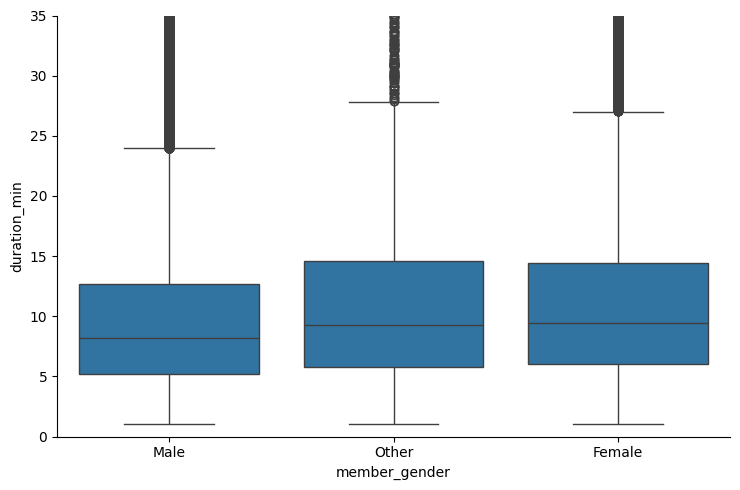

In [39]:
plt.figure(figsize=(10, 10))
g = sb.PairGrid(data=df, y_vars='duration_min', x_vars=['member_gender'], height=5, aspect=1.5)
g.map(boxgrid)
plt.ylim([0, 35])
plt.tight_layout();

> The y-axis limit has been decreased in the above plot from 85 minutes to 35 minutes as majority of the rides fall below the range of 35 minutes. 

> Through this limitation, it is highlighted that 'Male' gender outliers extend far, but the majority of ride duration would be within 25 minutes

> For both 'Other' and 'Female' gender, there is a noted compact distribution with shorter whiskers falling below 20 minutes. 

In [40]:
# new column
df['duration_hr'] = df['duration_min'] / 60

<Figure size 1000x1000 with 0 Axes>

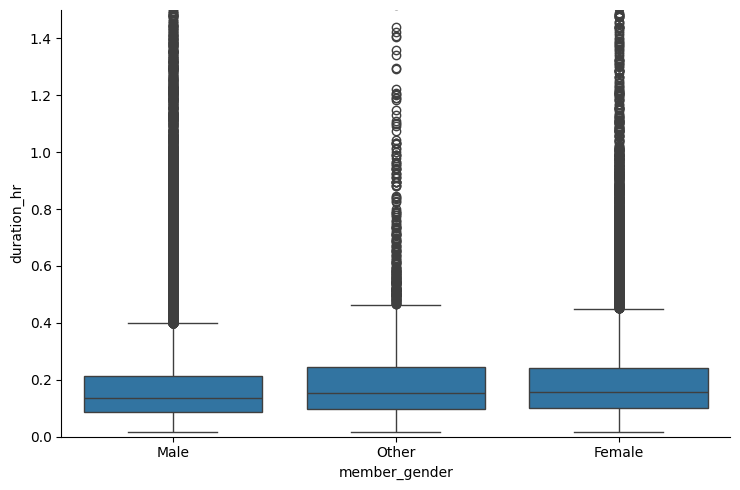

In [41]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color= 'tab:blue')
plt.figure(figsize=(10, 10))
s = sb.PairGrid(data=df, y_vars='duration_hr', x_vars=['member_gender'], height=5, aspect=1.5)
s.map(boxgrid)
plt.ylim([0, 1.5]) #limited to 1.5 hours
plt.tight_layout();

> The three plots indicate that accross all three genders, the median is considerd to be similar suggesting that regardless of genders, they tend to take similar trip durations. 

> 'Male' gender consistently accross three charts have a longer upper whisker illustrating a greater spread of duration. In addition, 'Male' gender, highlight a high number of outliers where there are some extending beyond 80 minutes in the initial plot and 1.4 hours in this plot above.

> When it comes up to 'Female' and 'Other' gender, they tend to have lower extreme outliers in comparsion to 'Male' gender where the trip duration is highlighy clustered near the median; This highlights that both the 'Female' and 'Other' gender are less likely to take higher duration trips.

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/183466612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='age_group', y='duration_hr', data=df, palette='Set1')


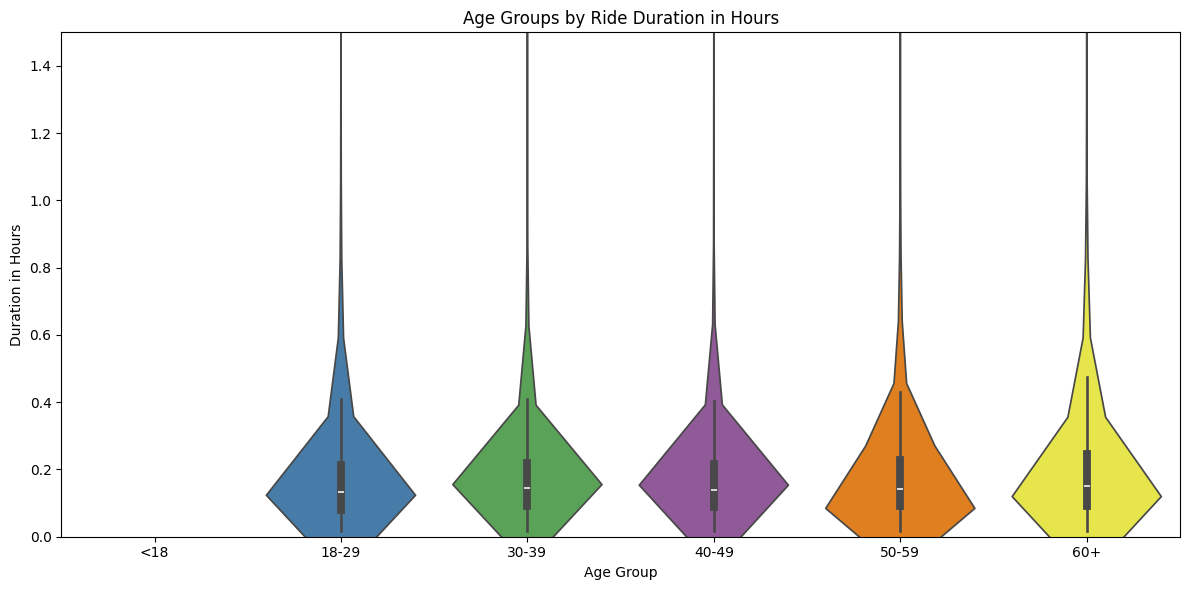

In [42]:
# age groups

plt.figure(figsize=(12, 6))
sb.violinplot(x='age_group', y='duration_hr', data=df, palette='Set1')
plt.title('Age Groups by Ride Duration in Hours')
plt.xlabel('Age Group')
plt.ylabel('Duration in Hours')
plt.ylim(0, 1.5)
plt.tight_layout();

> The duration among age groups are consistent where majority of the rides are falling under 20 minutes for all age groups. 

> There is a noted presence of long-duration exceeding over 20 minutes, however, it is considered to be rare accross all the age groups where some riders would take longer trips.

<Figure size 1000x1000 with 0 Axes>

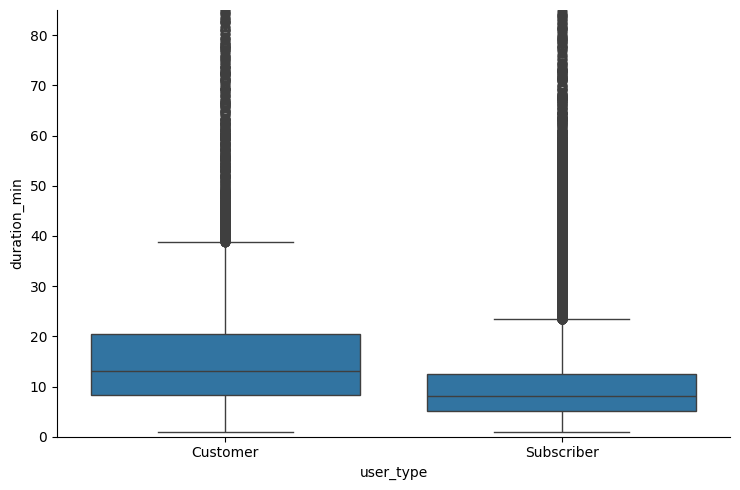

In [43]:
# customer type
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color= 'tab:blue')
plt.figure(figsize=(10, 10))
s = sb.PairGrid(data=df, y_vars='duration_min', x_vars=['user_type'], height=5, aspect=1.5)
s.map(boxgrid)
plt.ylim([0, 85])
plt.tight_layout();

> The above box plot shows that customers take longer trips on average with a higher variability in duration of rides. On the other hand, subscribers take shorter trip durations, but with more consistent ride durations; This highlights that the subscribers are utilizing the service more frequently but with shorter durations.


/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/693409921.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='bike_share_for_all_trip', y='duration_hr', data=df, palette='Set1')


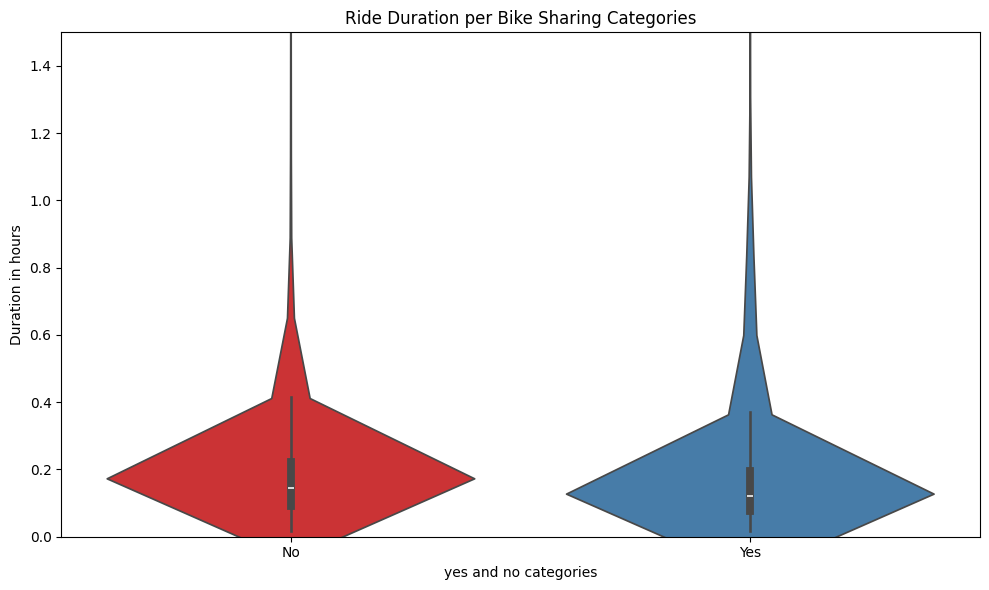

In [44]:
# bike sharing (y/n)

plt.figure(figsize=(10, 6))
sb.violinplot(x='bike_share_for_all_trip', y='duration_hr', data=df, palette='Set1')
plt.title('Ride Duration per Bike Sharing Categories')
plt.xlabel('yes and no categories')
plt.ylabel('Duration in hours')
plt.ylim(0, 1.5)
plt.tight_layout();

> Similar to above distributions, this was limited to 1.5 hours for clarity and to exclude extreme outliers. 

> From the plot above, it shows that the majority of users either utilizing or not utilizing the bike sharing option are concentrated among 6 to 18 minutes. In addition, for both groups, the plot is wide at 12 minutes, highlighting that majority of users in both categories are in this range.

> For users not uitlizing the bike sharing option, there is a higher distribution towards 18 minutes in which is an indication that users not utilizing the option might take slightly longer rides than those utilizing the bike sharing option.

> Overall, the violin shape for both 'no' and 'yes' groups are symmetrical indicating that duration is skewed towards shorter trip durations. In addition, the tail extends beyond 0.6 is extremely thin indicating that longer trips are not very common.

**Distance Accross Demographics**

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/1752914649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='member_gender', y='distance', data=df, palette='Set2')


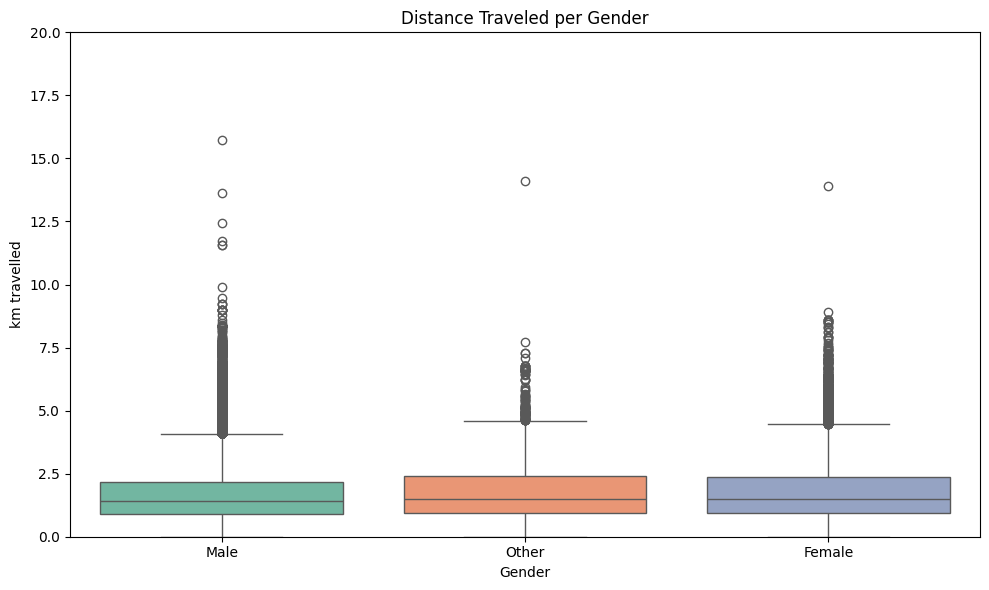

In [45]:
# gender
plt.figure(figsize=(10, 6))
sb.boxplot(x='member_gender', y='distance', data=df, palette='Set2')
plt.title('Distance Traveled per Gender')
plt.xlabel('Gender')
plt.ylabel('km travelled')
plt.ylim(0, 20) #limited to 20 as there is an outlier in females reaching 70
plt.tight_layout();

> The median distance is considered to be small accross all genders where it ranges from 2 to 2.5 km

> The IQR is also similar accross all genders where majority of the rides are between an approximate of 1 to 3 km.

> There are outliers spotting accross all genders in which represents trips with higher distance, the outliers initially in females went beyond 70 km in which is now not present in the plot as ylim is set to 20 max. Regardless, there are still outliers highlighting longer distances where 'Male' gender reaches up to 17.5 and are considered to be more frequent than the other genders. Furthermore, 'female' gender also highlights some outliers where the distance reaches up to 10 km. The 'other' gender has the lowest number of outliers where the maximum distance does not go as far as both 'male' and 'female' genders.

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/3478662859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='age_group', y='distance', data=df, palette='Set1')


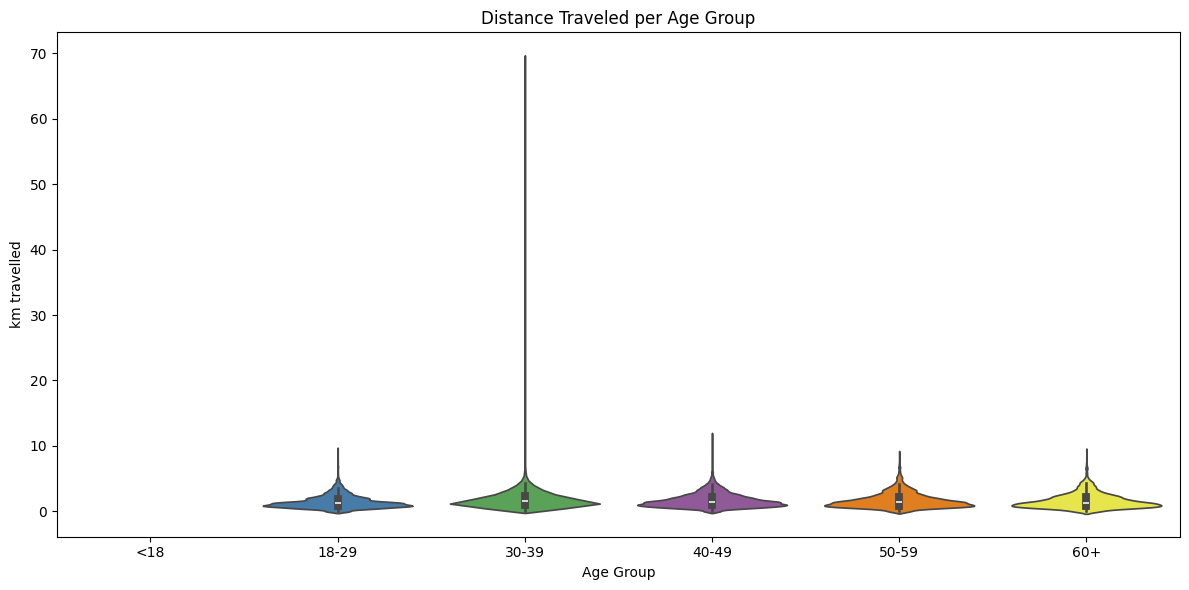

In [46]:
# age groups
plt.figure(figsize=(12, 6))
sb.violinplot(x='age_group', y='distance', data=df, palette='Set1')
plt.title('Distance Traveled per Age Group')
plt.xlabel('Age Group')
plt.ylabel('km travelled')
plt.tight_layout();

> The median distance is small accross the different age groups where it is approximately 2 km; This shows that there is not a high variation accross the age group. Similarly, the IQR is also small accross all age groups ranging from 1 km to 3 km; This highlights that regardless of age the trip distance is small.

> Unlike the previous plot the y-axis was not limited to 70 km in which is highlighted in the plot above, this shows that there are major outliers for the age groups 30-39 reaches 70 km highlighting a small percentage of that age group taking significantly longer trips. The other age groups also show outliers, however, they do not go as high as 70 km where they are up to approximately 10 km.

> Regardless, the trip duration accross ages are short.

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/1228273590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='user_type', y='distance', data=df, palette='Set3')


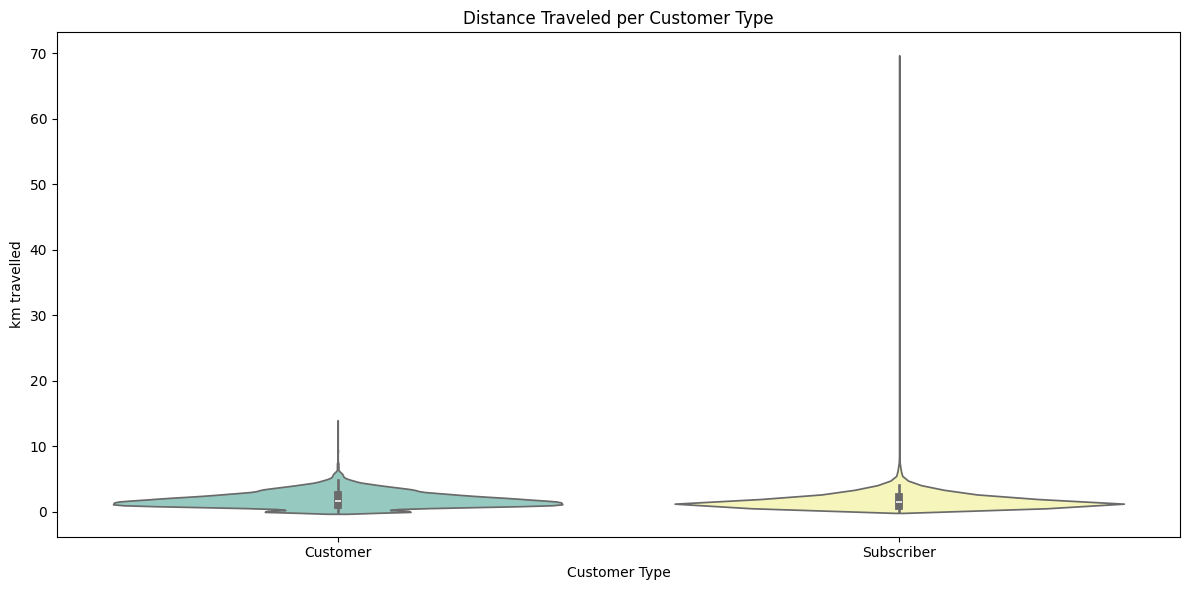

In [47]:
# customer type
plt.figure(figsize=(12, 6))
sb.violinplot(x='user_type', y='distance', data=df, palette='Set3')
plt.title('Distance Traveled per Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('km travelled')
plt.tight_layout();

> Majority of the rides have short distance travelled where both 'customer' and 'subscriber' are mostly concentrated around 2 km. Howevever, subscribers user type seem to have extreme outliers reachng up yo 70 km while customers have fewer long distance outliers; This indicates that customers may tend to take shorter trips than subscribers.

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/4053116541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='bike_share_for_all_trip', y='distance', data=df, palette='Set1')


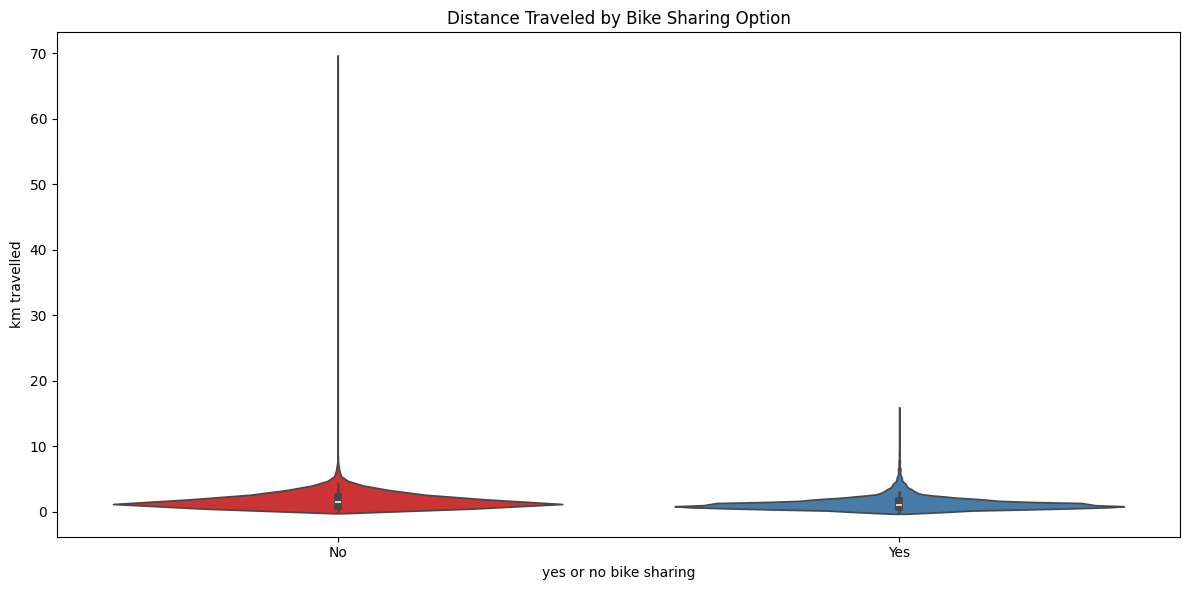

In [48]:
# bike sharing (y/n)
plt.figure(figsize=(12, 6))
sb.violinplot(x='bike_share_for_all_trip', y='distance', data=df, palette='Set1')
plt.title('Distance Traveled by Bike Sharing Option')
plt.xlabel('yes or no bike sharing')
plt.ylabel('km travelled')
plt.tight_layout();

> For both users utilizing and not utilizing the bikehsaring option, the median distance is approximately 2 km; It highlights that regardless of the bike sharing option, the distance is similar. However, the users not utilizing the bike-sharing option have a wider distribution in which indicates that those users take longer trips in comparsion to users who utilize the bike-sharing option. On the other hand, the users utilizing the bike-sharing option have a compact distribution indicating that they have shorter trips.
	
> Users who do not utilize bikesharing have long distance outliers reaching up to 70km, unlike users who utilize the bikesharing option highlighting lower distance with and outlier reaching 10 km.

**Trip Duration per Days of the Week**

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/2295144137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='Day_S', y='duration_hr', data=df, palette='Set3')


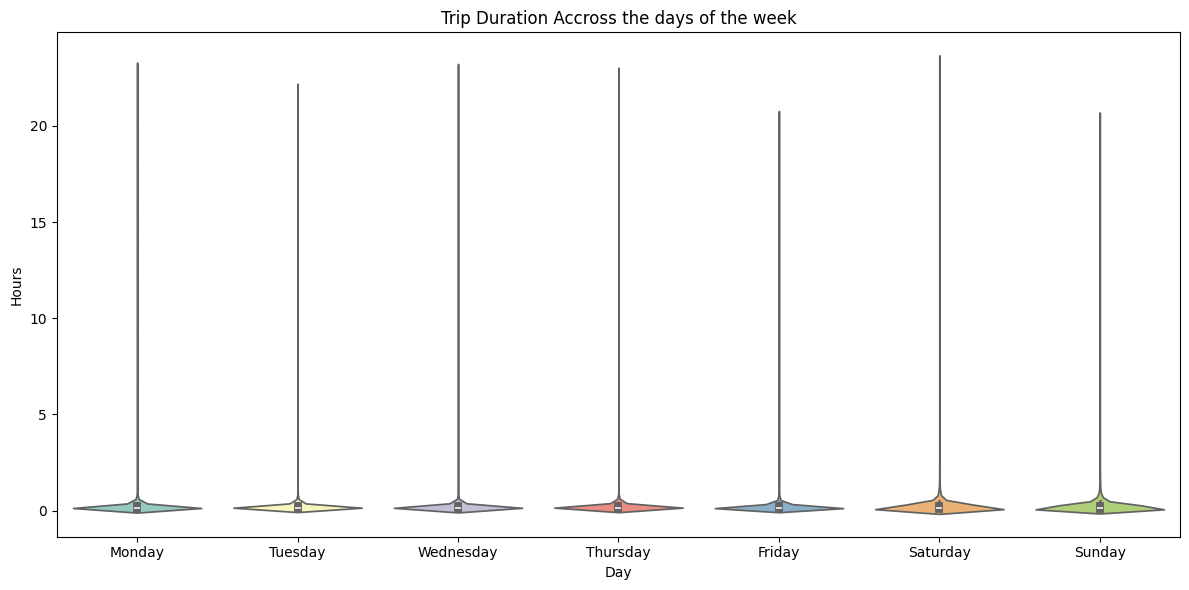

In [49]:
#with outliers
plt.figure(figsize=(12, 6))
sb.violinplot(x='Day_S', y='duration_hr', data=df, palette='Set3')
plt.title('Trip Duration Accross the days of the week')
plt.xlabel('Day')
plt.ylabel('Hours') 
plt.tight_layout();

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/3744558737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='Day_S', y='duration_hr', data=df, palette='Set3')


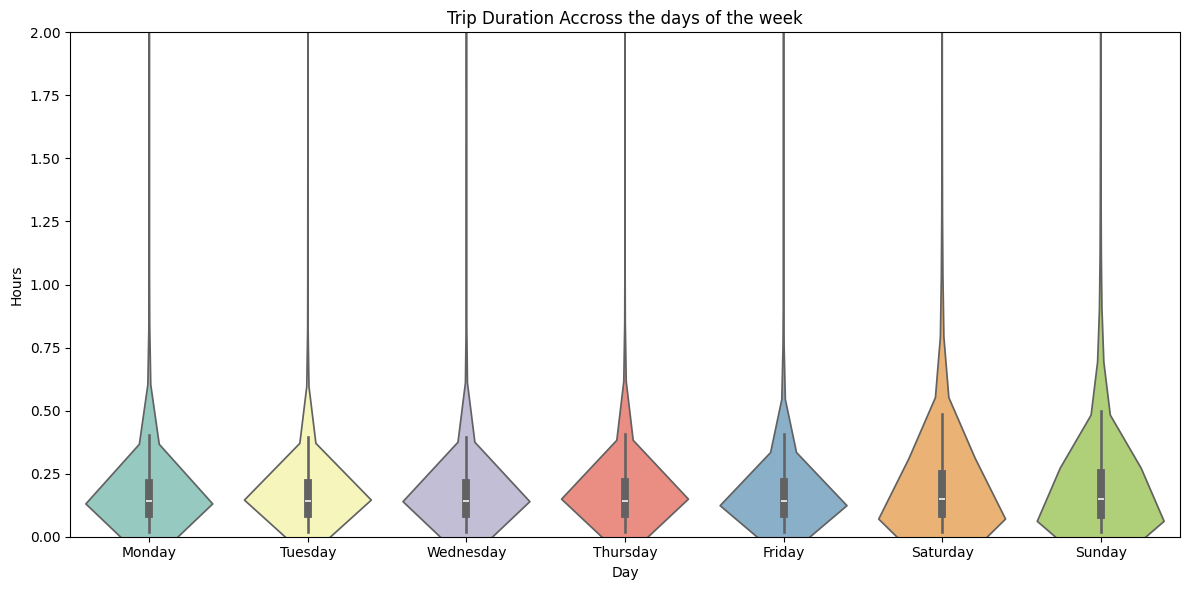

In [50]:
#without outliers
plt.figure(figsize=(12, 6))
sb.violinplot(x='Day_S', y='duration_hr', data=df, palette='Set3')
plt.title('Trip Duration Accross the days of the week')
plt.xlabel('Day')
plt.ylabel('Hours')
plt.ylim(0, 2)
plt.tight_layout();

> The median duration is cosnsitent accross the different days of the week around 15 minutes or 0.25 hours; This indicates that the trip duration is not signifcant regardless of the day of the week.

> The IQR is also similar accross the days of the week where 50% of trips fall between 9 to 20 minutes or 0.15 to 0.35 hours.

> All days of th. week highlight long duration outliers where some trips exceed 1 hour. Regardless, the majority of trips are concentrated with shorter durations.

> In addition, there isn't a big variation in trip duration between weekdays and weekends, indicating that riders tend to take trips of similar durations regardless of the day.

**Trip Distance per Days of the Week**

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/1688404808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='Day_S', y='distance', data=df, palette='Set2')


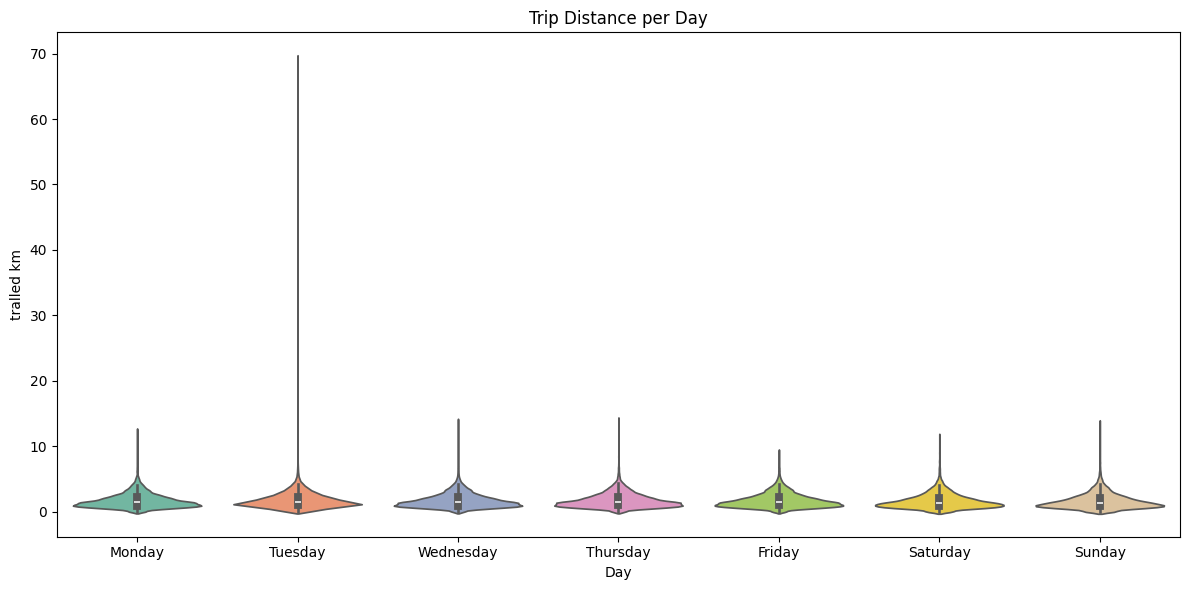

In [51]:
plt.figure(figsize=(12, 6))
sb.violinplot(x='Day_S', y='distance', data=df, palette='Set2')
plt.title('Trip Distance per Day')
plt.xlabel('Day')
plt.ylabel('tralled km')
plt.tight_layout();

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/2825691438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='Day_S', y='distance', data=df, palette='Set2')


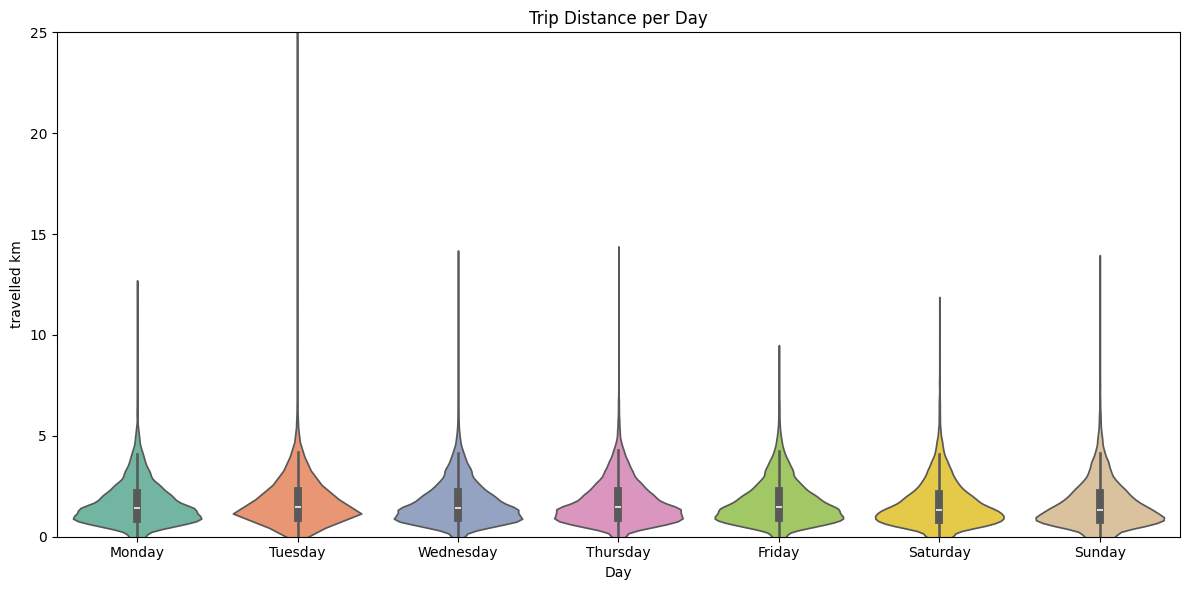

In [52]:
#minimizing outliers
plt.figure(figsize=(12, 6))
sb.violinplot(x='Day_S', y='distance', data=df, palette='Set2')
plt.title('Trip Distance per Day')
plt.xlabel('Day')
plt.ylabel('travelled km')
plt.ylim(0,25)
plt.tight_layout();

> Most trips accross the week are short in which are between 1 to 3 kms with a median distance between 2 to 3 km. 

> There are signficant outliers on Tuesday reaching 70km in which were later limited in second plot; Regardless, this suggests a higher variability of distance on Tuesday in comparsion to other days of the week.

**Time and Station**

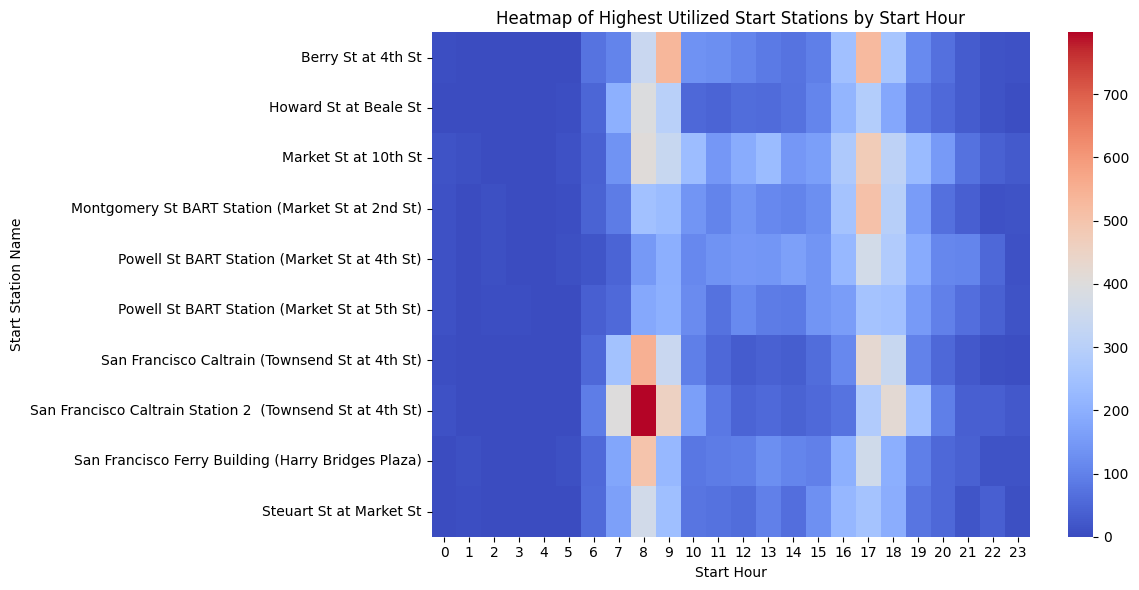

In [53]:
#start station and start time
t_stations = df['start_station_name'].value_counts().nlargest(10).index
df_top_stations = df[df['start_station_name'].isin(t_stations)] #showing highest stations
s_station = df_top_stations.pivot_table(index='start_station_name', columns='start_hr', values='age_group', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 6))
sb.heatmap(s_station, cmap='coolwarm', annot=False)
plt.title('Heatmap of Highest Utilized Start Stations by Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Start Station Name')
plt.tight_layout();

> The above plot highlights that majority of the activity is found between 7 to 9 AM in relation to the stations 'San Francisco Caltrain Station' and 'Montgomery St BART Station'; This suggests that for morning commutes, these two stations are considered to be the most popular.

> Furthermore, the above plot highlights for the time of 5 to 6 pm, there is a higher utilization for transit stations such as 'San Francisco Ferry Building' and 'Montgomery St BART Station'; This suggests that these are starting stations for commute once users have completed work.

> There is little activity between 0 to 5 am and then from 9 pm further.

> It is important to note that this is only highlighting the top 10 utilized stations.

/var/folders/3d/d_sx1dls3yv73t2kw2ps7x100000gn/T/ipykernel_54724/1528043874.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  e_station = df_top_e_stations.pivot_table(index= 'end_station_name', columns = 'end_hr', values = 'age_group', aggfunc = 'count', fill_value = 0)


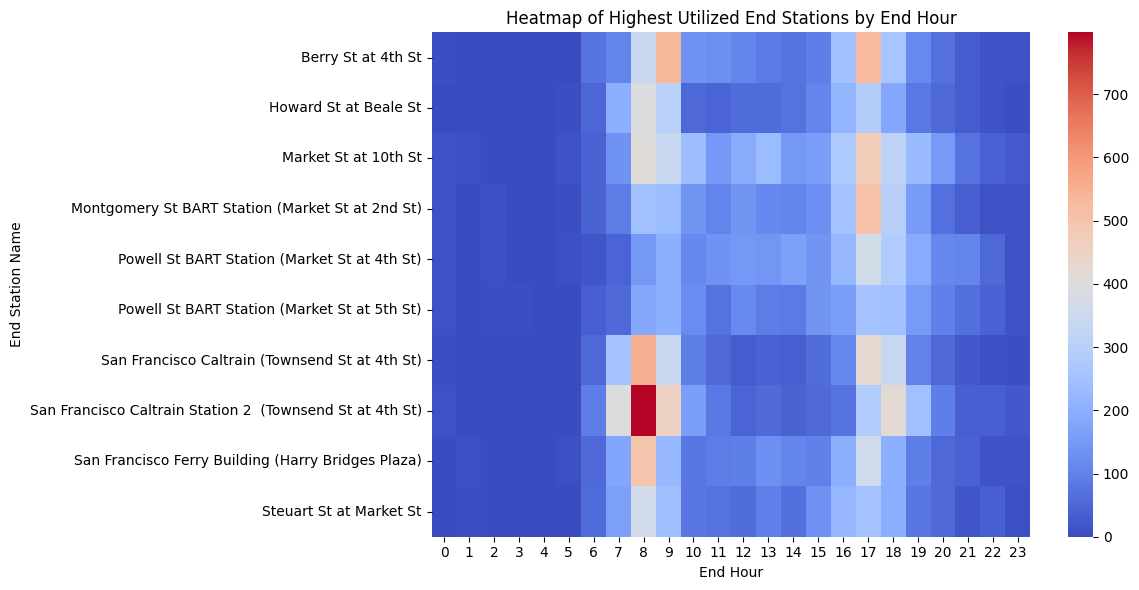

In [54]:
#end station and end time

t_station_e = df['end_station_name'].value_counts().nlargest(10).index
df_top_e_stations = df[df['end_station_name'].isin(t_station_e)] #showing the highest number (end)
e_station = df_top_e_stations.pivot_table(index= 'end_station_name', columns = 'end_hr', values = 'age_group', aggfunc = 'count', fill_value = 0)
plt.figure(figsize = (12,6))
sb.heatmap(s_station, cmap='coolwarm', annot=False)
plt.title('Heatmap of Highest Utilized End Stations by End Hour')
plt.xlabel('End Hour')
plt.ylabel('End Station Name')
plt.tight_layout();

> Similar to start stations, there is an evening peak from 5 PM in the stations 'San Francisco Caltrain Station' and 'Montgomery St BART Station' at the end station and end hour. 

> Furthermore, there is an activity between 7 to 9 AM with the end stations in which highlight that the majority of the users finish the trip at the mentioned stations.

**Distance and Duration**

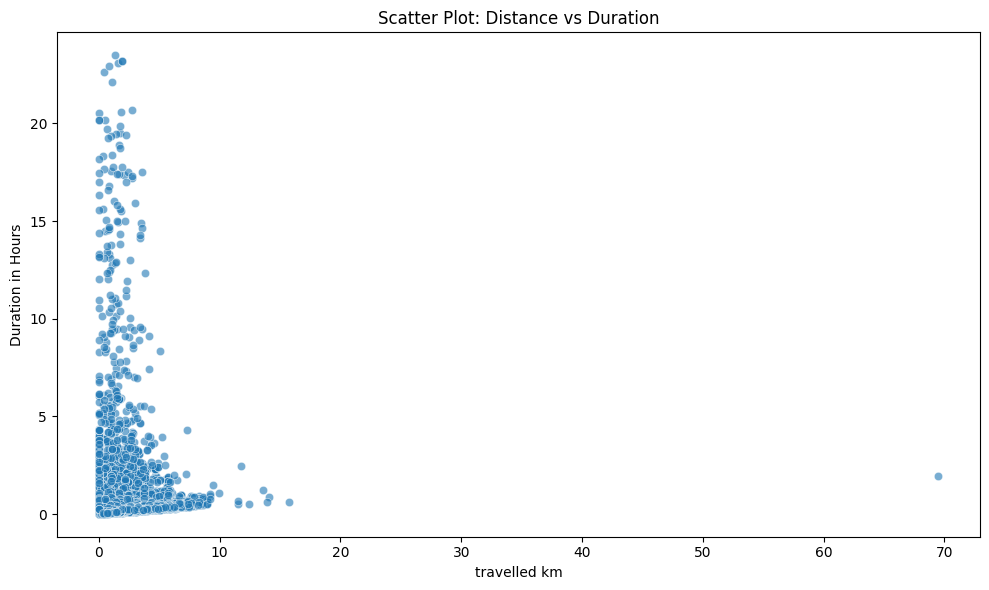

In [55]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='distance', y='duration_hr', data=df, color='tab:blue', alpha=0.6)
plt.title('Scatter Plot: Distance vs Duration')
plt.xlabel('travelled km')
plt.ylabel('Duration in Hours')
plt.tight_layout();

> The plot above indicates that majority of the trips are for short distances in which are less than 10km with a durationn less than an hour alliging with the thoery that majortiy of the rides are for functional commutes.

> However, the plot also highlights that there are short distances crossed, however, with prolonger usage of duration exceeding 10 hours; This can indicate that some users may try to ensure securing the vehile during their working hours through not returning them until completed, resulting in unusual long duration but with low travelled kms.

> There's a single outlier for 70km with a moderate duration of an hour that indicates a long ride and long duration standing out from the rest.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The duration of rides revealed that majority of the rides last 15 minutes with significant outliers highlighting longer trips; The duration is consistent accross different demographics such as age and gender in which suggests that users typically utilize the service for short trips. The outliers may highlight that the bike is not utilized for functional trips, but instead may be utilized for leisure purposes, particularly seen the age group of 30 to 39 and users not utlizing the bike-sharing option.

> When it comes up to age, the age group 30 to 39 highlighted a great variance in the distance with the longest trips. Other age groups had lower trip distance and were almost consistent.

> When it comes up to gender, 'male' gender highlighted a higher variability in both duration and distance in comparsion to 'other' and 'female' gender. 

> When it comes up to customer type, the subscribers were considered tobe more likely to take longer trips with a higher rate of outliers in comparsion to customers who presented shorter trips with a more consistent ride pattern; This alligns with the initial theory that subscribers may be utilizing the service for regular commute.

> In terms of the bike sharing utilization, users utilizing it had trips shorter in length and duration in comparsion to users who did not utilize the bike-sharing service; This indicates that users utilizing the bike-sharing services are more likely to utilize the service for shorter and more functional trips in comparsion to those who did not utilize the bike-sharing service.

> The start and end time are related to certain stations; Through this exploration, I was able to determine the top and stations utilized by users and when they are most frequently utilized, from this it was apparent that the three top stations utilized for functional commuting at start are 'San Francisco Caltrain Station', 'San Francisco Ferry Building' and 'Montgomery St BART Station'. This would be interesting to explore further in the next section to see their influence with their day of the week and different demographics as well.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There were certain elements that were not initially a part of interest, however, they displayed interesting results. The first element of interest was the day of the week and the trip duration in which highlighted that across business days, the trip duration was relatively consistent, however, on weekends, the data highlighted that users take longer trips, that do not fit into the commuting usage patterns, while instead, suggesting that it was leisure trips.

> Furthermore, when investigation the day of the week and trip distance, the trip distance was consistent throughout business days, however, Tuesday highlighted significant outliers with higher trips indicating that there may a specific event on that day or a pattern on that day. In addition, the age group 30 to 39 years showed a higher variability than other age groups; This highlights that this age group might be more likely to take shorter commutes for functional purposes while also taking longer recreational trips. 

## Part VI - Multivariate Exploration

> The following section consist of plots in which investigates three or more variables to investigate the data even further.

**Distance vs Duration by Gender and User Type**

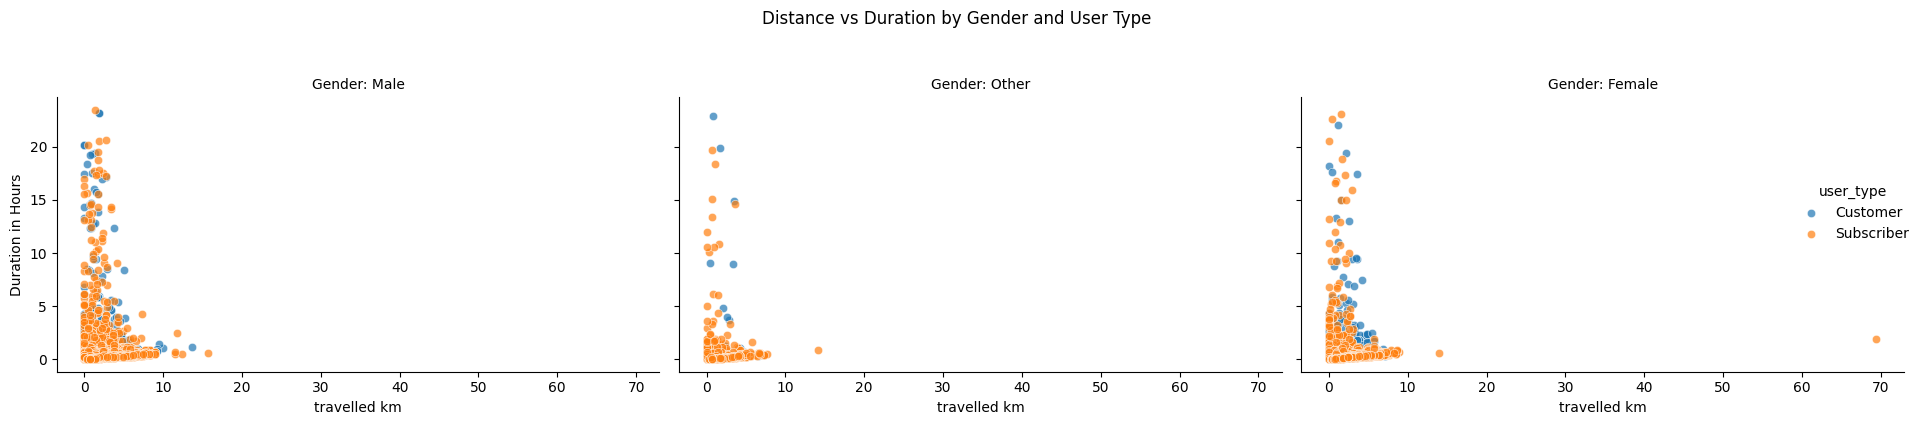

In [56]:
g = sb.FacetGrid(df, col='member_gender', hue='user_type', height=4, aspect=1.5)
g.map(sb.scatterplot, 'distance', 'duration_hr', alpha=0.7, sizes=(20, 200), edgecolor='w')
g.add_legend()
g.set_axis_labels("travelled km", "Duration in Hours")
g.set_titles("Gender: {col_name}")
g.fig.suptitle("Distance vs Duration by Gender and User Type", y=1.05)
plt.tight_layout();

> The plot highlights that there is an inverse relationship between distance in km and trip duration where as distance increases the duration decreases. Therfore, shorter distances tend to take more time.

> Majority of the trip take short distance between 0 to 10 km with a short duration in which is below than 2 hours.

> Looking at Genders, the patterns between genderrs are similar where a lot of the trips are short (both duration and distance). However, 'Male' gender presents outliers in terms of both duration and distance where it is noted for 'Male' Gender that there is distance higher than 50 km and duration higher than 20 hours; Regardless, it is noted that these outliers are not very freqeuent. On the other hand, both 'Other' and 'Female' genders have fewer outliers in comparsion to male.

> The plot also highlights customer and subscriber where subscriber is in orange and customers are represented in blue. When it comes to the subscribers, they tend to have a larger number of short trips in terms of distance duration which alligns with the theory that subscribers are more likely to utilize the service for shorter times but for routine activities. However, customers have a more varied distribution with some longer trips indicating that those not subscribed to the service may occassionaly take trips that are longer.

**Gender vs Duration by Gender and Bike Share**

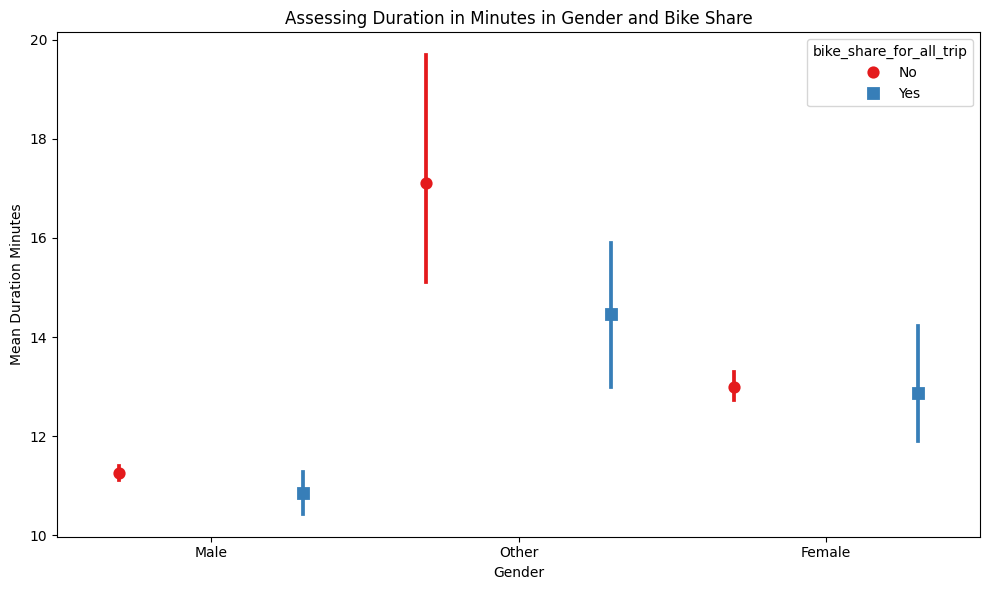

In [57]:
plt.figure(figsize=(10, 6))
ax = sb.pointplot(data = df, x= 'member_gender', y= 'duration_min', hue='bike_share_for_all_trip',palette='Set1', linestyles='', dodge=0.6, markers=["o", "s"])
plt.title('Assessing Duration in Minutes in Gender and Bike Share')
plt.xlabel('Gender')
plt.ylabel('Mean Duration Minutes')
plt.tight_layout();

> The plot above highlights the different genders and emphasizes on the duration per whether the user utilizes bike sharing or not. 

> The red cirles highlight users who do not participate in bike sharing while blue squares highlight users who utilize bike sharing; When it comes up to users who do not utilize the bike sharing feature, tend to have shorter trips accross both the genders of 'male' and 'female. However, the 'other' gender who do not utilize the bike sharing service tend to take longer trips. 

**Trip Duration Accross Weekdays Comparing Different Demographics**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


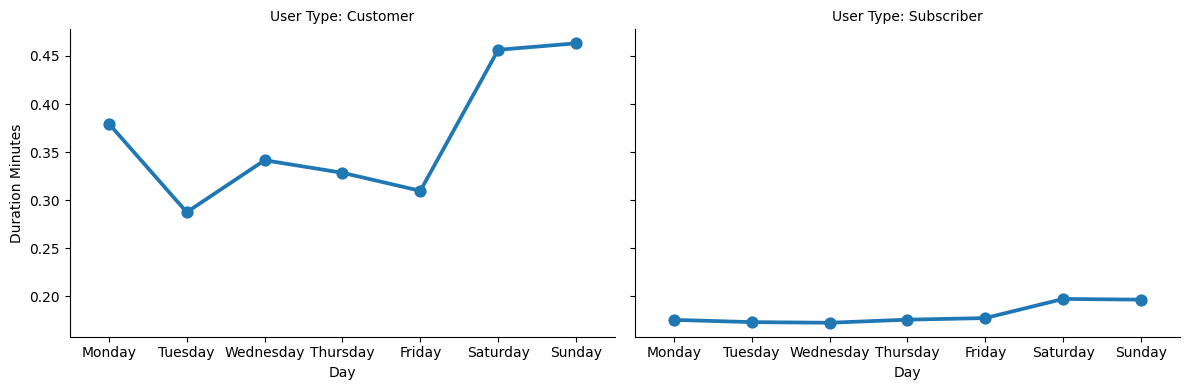

In [58]:
# with user type
g = sb.FacetGrid(df, col='user_type', height=4, aspect=1.5)
g.map(sb.pointplot, 'Day_S', 'duration_hr', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ci=None)
g.set_axis_labels('Day', 'Duration Minutes')
g.set_titles('User Type: {col_name}')
plt.tight_layout();

> For customers, the plot above highlights that there is more variation throughout the week in terms of duration; It is noticed that there isan increase in duration during the weekend (Saturday and Sunday), with an average trip duration of 45 minutes on a Saturday. However, during the weekday, there is almost a consistency of duration in which is approximately half an hour. On Tuesday, it is noted that there is a drop followed by a gradual increase.

> For subscribers, the trip duration pattern is considered to be more consistent throughout the days of the week with low variation. On average, the duration on average is 20 minutes with a slight increase on the weekend (Saturday, and Sunday), but this increase is not as signficant as the increase in the customer.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


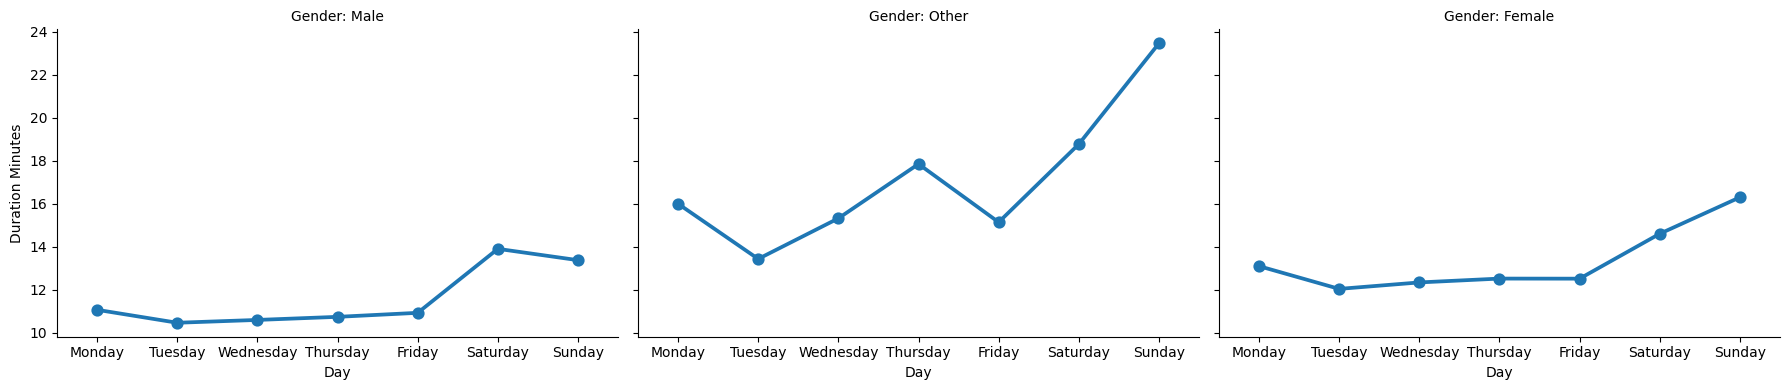

In [59]:
# with gender
g = sb.FacetGrid(df, col='member_gender', height=4, aspect=1.5)
g.map(sb.pointplot, 'Day_S', 'duration_min', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ci=None)
g.set_axis_labels('Day', 'Duration Minutes')
g.set_titles('Gender: {col_name}')
plt.tight_layout()
plt.show()

> Three plots are above for each gender.

> For 'male' users, the trip duration is stable during business days where the duration is between 12 to 14 minutes on average. However, there is an increase on Saturday and gradual decrease on Sunday; This suggests that 'Male' users take longer trips on Weekends, especially Saturday in comparsion to the other days of the week.

> For 'other' users, the trip duration varies across the dats of the week where there is a decline on Tuesday and then an increase from Wednesday to Thursday; Therfore, the 'Other' gender shows the ost variety in duration in comparsion to other genders where there's high duration and low duration observed. 

> For 'female' users, similar to 'male' users, the duration is considered to be almost consistent across the week with an increase on Satruday; This suggests that 'female' users also utilize the service for longer during the weeknd.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-p

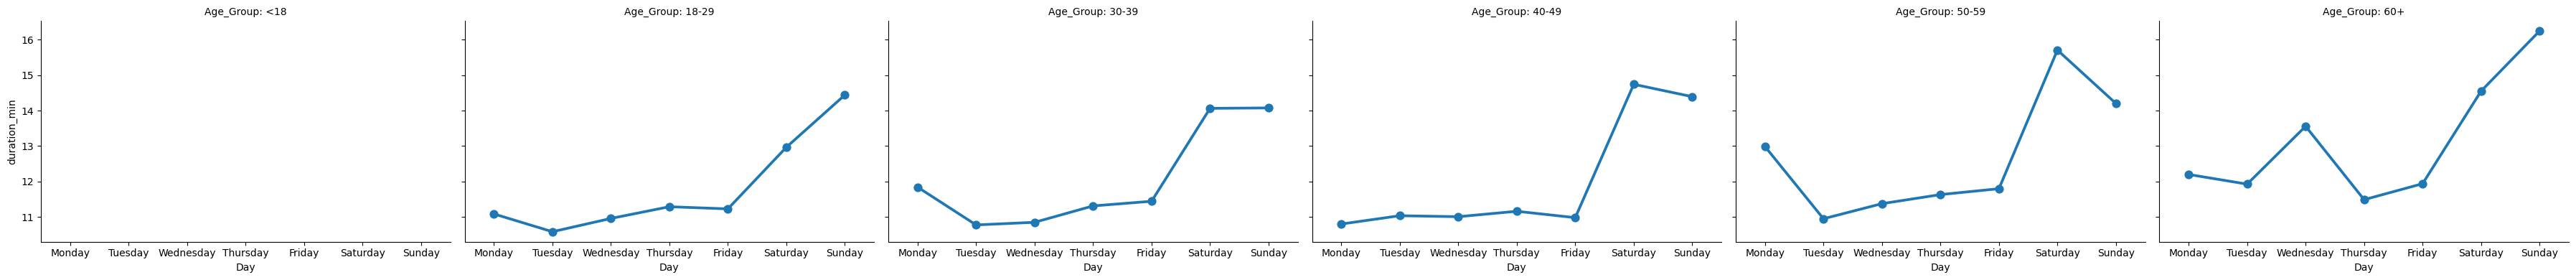

In [60]:
#age group
g = sb.FacetGrid(df, col='age_group', height=4, aspect=1.5)
g.map(sb.pointplot, 'Day_S', 'duration_min', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ci=None)
g.set_axis_labels('Day')
g.set_titles('Age_Group: {col_name}')
plt.tight_layout();

> For all of the age groups, there is an increase in usage during weekends.

> For the groups between 18 to 29 and 30 to 39, there is a more consistent pattern of trips during business days with a noticeable increase during the weekends across both age groups. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Within the following section, different relationships were crreated in which assisted in reinforcing patterns related to user demographics, trip details, and behaviour.

> The first key observation is related to the trip duration along the weekdays where observations were made accross demographics including user type, age group, and gender. The trip durations were observed to be shorter during the business days in comparsion to weekends where there is an increase in duration in weekends. For the age groups from 50 and above, there was a noted longer duration during weekends compared to users in lower age groups. Regardless, for all age groups, the duration has peaked on Sunday.

> The second line of observations was related to the user type and consistency throughout the weekdays where subscribers illustrated more frequent and shorter trips in which are assumed to be functional related activities (such as work, class, etc). However, customers highlighted a higher variability accross their trip duration, specifically during weekends; This highlights that customers might utilize the service for longer durations. Therefore, it can be said that subscriber utilize the service more frequently but for shorter durations that customers.

> The third line of observation was related to gender and trip duration where in 'male' users and 'female' users there is ahigher trip duration during the weekends with 'male' users exhibiting a higher increase than 'females'; This was noted especially when looking at the outliers where 'male' users had longer durations in comparsion to 'female' users. Unlike the 'male' and 'female' gender patterns, the 'other' user patterns highlighted a high fluctuation throughout the week days and a signficant peak on Sunday; This indicates that the 'Other' gender has a different pattern than the other two genders. 

> The combination of different demographic information were insightful as it was able to highlight how trip varied by frequency and service use; For example, younger subscribers are more likely to take short trips while older subscribers are more likely to take long trips but in a lower frequency.

### Were there any interesting or surprising interactions between features?

> There are different interesting interactions between features that were not anticipated. For example, the ‘other’ gender and the trip duration was surprising as there was a large fluctuations across the days of the week. The following fluctuation present was not seen in the ‘female’ and ‘male’ gender. 

> Another interesting factors was the usage patters across customers and subscribers where it was noted that subscribers took shorter trips (It was initially hypothesized that as subscribers are subscribed to the service, they might have higher durations). However, it was noted that customers had higher durations than subscribers. If the month data was present, I could have compared the customers utilization during the days of the month to identify if the peak of usage was during festive seasons such as December for Christmas. 

> Furthermore, the relation between gender and bike share utilization was interesting as initially expecting that those who utilize the service take shorter trips, the data revealed that the ‘Other’ gender group, not utilizing the bike sharing service had significantly longer trips compared to bike-share participants.

> In addition, the most interesting element was the distance and duration where longer distances crossed highlighted shorter duration while those who utilize the service for shorter distance take longer duration.

## Conclusions

> An analysis was conducted on the Ford GoBike sharing program in which revealed various patterns related to user behavior, bike utilization (duration and distance),and user demographics. The analysis highlighted that majority of users, regardless of gender and age, utilize the service for prolonged periods of time on weekends, specifically on Sunday. Furthermore, the analysis highlighted the subscribers displayed consistent patterns with shorter trips during business days while customers showed a higher variance with a longer weekend ride duration. The following insights among more provide a deeper understanding on how different types of user groups interact with the service.

> Based on the insights gained, various recommendations have been placed for Ford GoBike sharing program:

1. Due to the long durations observed among customers over the weekend, there should be a weekend-speicifc promotion or discounts to encourage longer rides and rides across higher distances; This can be achieved through creating programs such as weekend passes.
2. Furthermore, it was noted that subscribers displayed behavior of shorter trips on a consistent basis across business days; Ford GoBike can incentivize the following user base by offering long-term subscriptions at a reduced price or through offering “Monthly Commuter” plan in which provides promotions on the rides.
3. In addition, the data highlights that there are users above the age of 50 who tend to take longer trips during the weekends; This insight can be captured in Marketing plans in which highlight that they have this age group utilizing the service for prolonged periods of time and correlating it with safety, comfort, and further recreational benefits. 
4. In addition, as it was seen that across different demographical information, there was an increase in weekend usage, so there might be a need to increase bike availability at stations due to this ride. 

